## According to a 2010 report made by the US Federal Aviation Administration, the economic price of domestic flight delays entails a yearly cost of 32.9 billion dollars to passengers, airlines and other parts of the economy. More than half of that amount comes from the pockets of passengers who not only lose time waiting for their planes to leave, but they also miss connecting flights, spend money on food and have to sleep on hotel rooms while they're stranded. 

## The report, focusing on data from year 2007, estimated that air transportation delays put a 4 billion dollar dent in the country's gross domestic product that year. Full report can be found [here](http://www.isr.umd.edu/NEXTOR/pubs/TDI_Report_Final_10_18_10_V3.pdf).

## But, what are the causes for these delays?

### In order to answer this question, we are going to analyze the provided dataset, containing up to 1.936.758 different internal flights in the US for 2008 and their causes for delay, diversion and cancellation; if any. 

### The data comes from the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS). 

### The results are tentative.


# This dataset is composed by the following variables: 

1.	**Year**	2008
2.	**Month**	1-12
3.	**DayofMonth**	1-31
4.	**DayOfWeek**	1 (Monday) - 7 (Sunday)
5.	**DepTime**	actual departure time (local, hhmm)
6.	**CRSDepTime**	scheduled departure time (local, hhmm)
7.	**ArrTime**	actual arrival time (local, hhmm)
8.	**CRSArrTime**	scheduled arrival time (local, hhmm)
9.	**UniqueCarrier**	unique carrier code
10.	**FlightNum**	flight number
11.	**TailNum** plane tail number: aircraft registration, unique aircraft identifier
12.	**ActualElapsedTime**	in minutes
13.	**CRSElapsedTime**	in minutes
14.	**AirTime**	in minutes
15.	**ArrDelay**	arrival delay, in minutes: **A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).** 
16.	**DepDelay**	departure delay, in minutes
17.	**Origin**	origin IATA airport code
18.	**Dest**	destination IATA airport code
19.	**Distance**	in miles
20.	**TaxiIn**	taxi in time, in minutes
21.	**TaxiOut**	taxi out time in minutes
22.	**Cancelled**	*was the flight cancelled
23.	**CancellationCode**	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24.	**Diverted**	1 = yes, 0 = no
25.	**CarrierDelay**	in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
26.	**WeatherDelay**	in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
27.	**NASDelay**	in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. 
28.	**SecurityDelay**	in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
29.	**LateAircraftDelay**	in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

# Index
## 1. Understanding and preparing the data
## 2. Exploratory Data analysis
### 2.1 Cancelled flights
### 2.2 Delayed flights
#### 2.2.1 Late Aircraft Delay
#### 2.2.2 Carrier Delays 
#### 2.2.3   NAS Delay
# 3. The situation today
# 4. A glimpse of the future


# 1. Understanding and preparing the the data

In [4]:
#import needed libraries & float format definition

import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

pd.options.display.float_format = '{:.0f}'.format

In [5]:
# Reading and showing head data
flights = pd.read_csv("C:/Users/ruthv/Music/DelayedFlights.csv")
flights.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003,1955,2211,2225,WN,...,4,8,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754,735,1002,1000,WN,...,5,10,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628,620,804,750,WN,...,3,17,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829,1755,1959,1925,WN,...,3,10,0,N,0,2,0,0,0,32
4,5,2008,1,3,4,1940,1915,2121,2110,WN,...,4,10,0,N,0,NaN,NaN,NaN,NaN,NaN


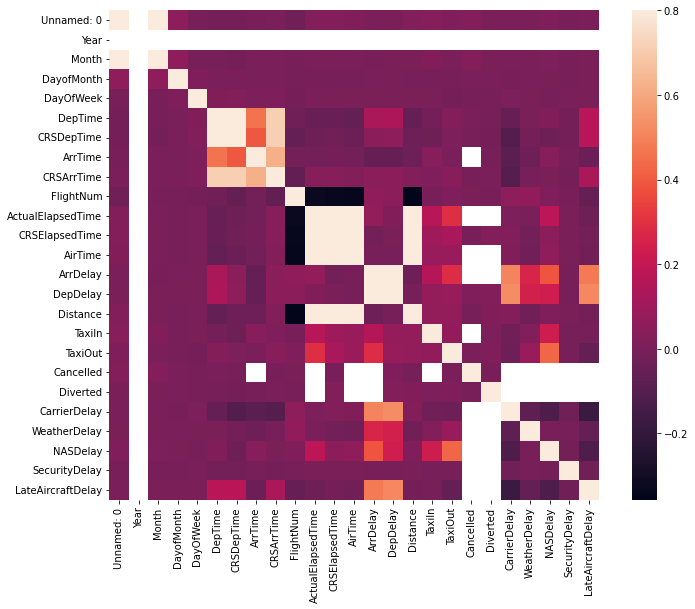

In [6]:
#correlation matrix
corrmat = flights.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

### Through the correlation matrix we can see how some of the 29 variables in the dataset present multicollinearity, in other words, can be linearly predicted from the others. In order to have a better analysis and work with a lighter dataset, we are going to delete some of those unwanted variables and create new ones.

### We can also make the following observations: 

#### 1. Only when Arrival Delay is longer than 15 minutes there's data about what caused the delay. Arrival Delay is the sum of CarrierDelay, WeatherDelay, NASDelay and LateAircraftDelay. In cases of cancelation or diversion there's no data related to delay causes. 

#### 2. More often than not, airports and carriers allocate a CRSElapsedTime higher than the actual time spent in the Taxi In + Taxi out + Airtime operations (Actual Elapsed Time). This is the reason why, when planes take off on time, landing usually takes place before the expected time! It also allows to absorb delay by late aircraft down the lane of chained flights. 

In [7]:

# creating new variables and renaming 
flights['DepDate'] = pd.to_datetime(flights.Year*10000+flights.Month*100+flights.DayofMonth,format='%Y%m%d')

#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in flights:
    flights.loc[flights['ArrDelay'] <= 15, 'Status'] = 0
    flights.loc[flights['ArrDelay'] >= 15, 'Status'] = 1
    flights.loc[flights['ArrDelay'] >= 60, 'Status'] = 2
    flights.loc[flights['Diverted'] == 1, 'Status'] = 3
    flights.loc[flights['Cancelled'] == 1, 'Status'] = 4
    
    
#Cancellation cause
flights.loc[flights["CancellationCode"] =="A", 'CancellationCode'] = "0"
flights.loc[flights["CancellationCode"] =="B", 'CancellationCode'] = "1"
flights.loc[flights["CancellationCode"] =="C", 'CancellationCode'] = "2"

# dropping the unwanted data   
flights = flights.drop("Unnamed: 0",1) #Empty
flights = flights.drop("Year",1) #Converted to date
flights = flights.drop("DayofMonth",1) #Converted to date
flights = flights.drop("DepTime",1) #Of the departure data we only keep the expected 
flights = flights.drop("DepDelay",1)
flights = flights.drop("ArrTime",1)
flights = flights.drop("CRSArrTime",1)
flights = flights.drop("ActualElapsedTime",1)
flights = flights.drop("CRSElapsedTime",1)
flights = flights.drop("Diverted",1)
flights = flights.drop("Cancelled",1)
flights = flights.drop("Distance",1)
flights = flights.drop("FlightNum",1)
flights = flights.drop("TailNum",1)

C:\Users\ruthv\AppData\Local\Temp/ipykernel_21908/654613296.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  flights = flights.drop("Unnamed: 0",1) #Empty
C:\Users\ruthv\AppData\Local\Temp/ipykernel_21908/654613296.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  flights = flights.drop("Year",1) #Converted to date
C:\Users\ruthv\AppData\Local\Temp/ipykernel_21908/654613296.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  flights = flights.drop("DayofMonth",1) #Converted to date
C:\Users\ruthv\AppData\Local\Temp/ipykernel_21908/654613296.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  flights = flights.drop("DepTime",1) #Of 

# 2. Exploratory Data analysis

C:\Users\ruthv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


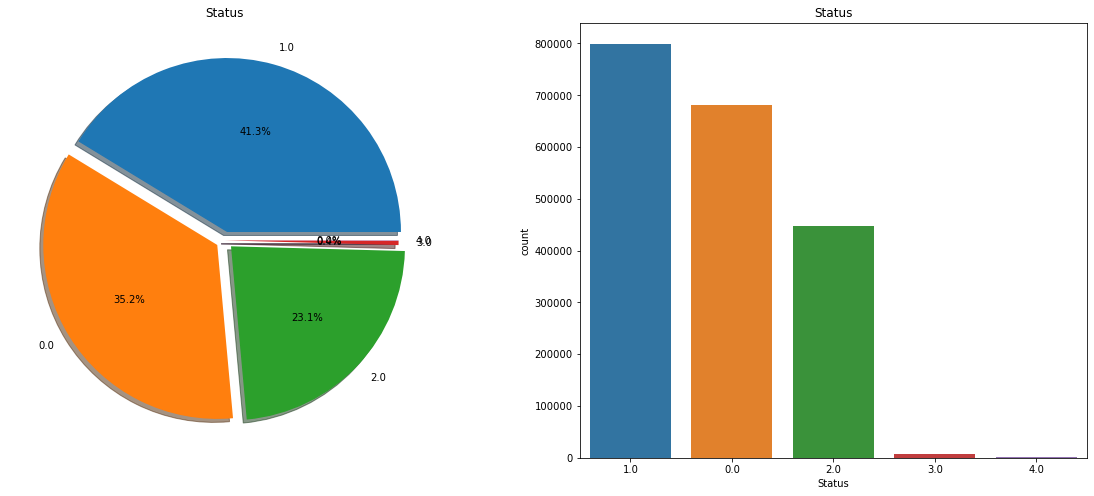

Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)


In [8]:
f,ax=plt.subplots(1,2,figsize=(20,8))
flights['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = flights['Status'].value_counts().index, data=flights,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')

### In 2008, a whooping 64,4% of domestic flights in the US were delayed by more than 15 minutes. 35,8% of them (or 23,1% of total fligths) had delays of more than one hour! Another different interpretation is that 76,5% of flights have delay of one hour or less. 

### On the other hand, just a 0,03% of flights were cancelled and 0,4% were diverted. 

## 2.1 Cancelled flights

C:\Users\ruthv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


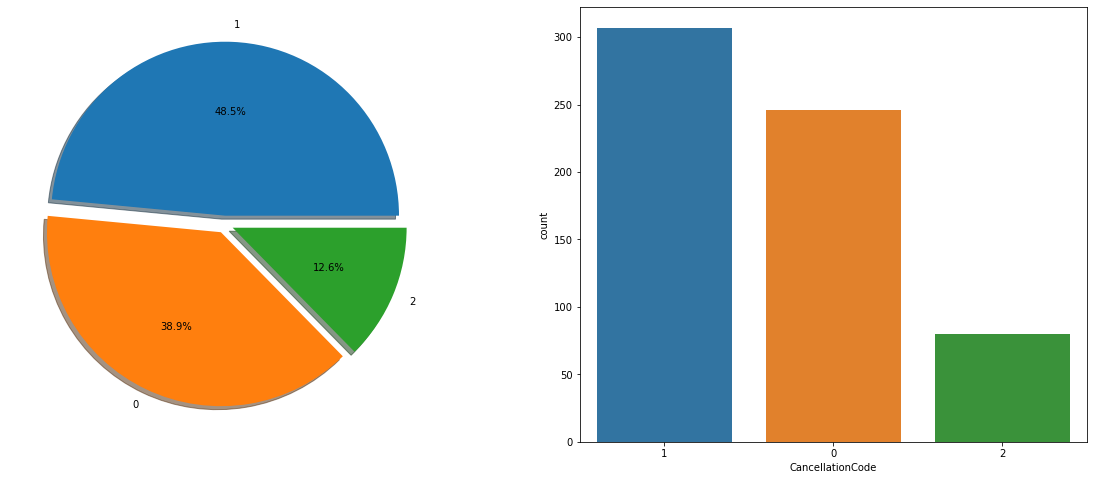

0 = carrier, 1 = weather, 2 = NAS


In [9]:
CancFlights = flights[(flights.Status == 4)]

f,ax=plt.subplots(1,2,figsize=(20,8))
CancFlights['CancellationCode'].value_counts().plot.pie(explode=[0.05,0.05,0.05,],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot('CancellationCode', order = CancFlights['CancellationCode'].value_counts().index, data=CancFlights, ax=ax[1])
plt.show()


print('0 = carrier, 1 = weather, 2 = NAS')

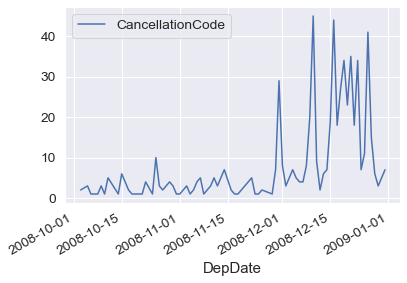

In [55]:
CancFlights[['DepDate','CancellationCode']].groupby(['DepDate']).count().plot()
plt.show()

### During 2008, there were only cancellations in the last three months of the year (from October to December). Doing a bit of research we find that 2008 winter was unusual, especially in December, with coast-to-coast severe winter weather, including one low pressure system from December 9-12 that brought snow to Houston and New Orleans, severe storms and flooding to other parts of the South, and an ice storm that left more than 1.27 million homes and business without power in the Northeast. 
### The bad weather might actually be the reason behind all the cancellations, since for rest of the year there are no registered cancellations at all. The compounded effect of the flights cancelled affect other programmed flights down the lane. 

## 1.2.2 Delayed flights

In [10]:
Delayedflights = flights[(flights.Status >= 1) &(flights.Status < 3)]

C:\Users\ruthv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


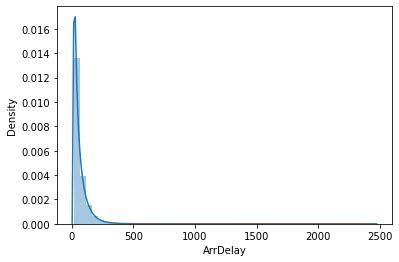

In [11]:
#histogram
sns.distplot(Delayedflights['ArrDelay'])
plt.show()

In [12]:
#skewness and kurtosis
print("Skewness: %f" % Delayedflights['ArrDelay'].skew())
print("Kurtosis: %f" % Delayedflights['ArrDelay'].kurt())

Skewness: 4.059856
Kurtosis: 40.381941


### It can be seen on the histogram and by the skewness and kurtosis indexes, that delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time. 

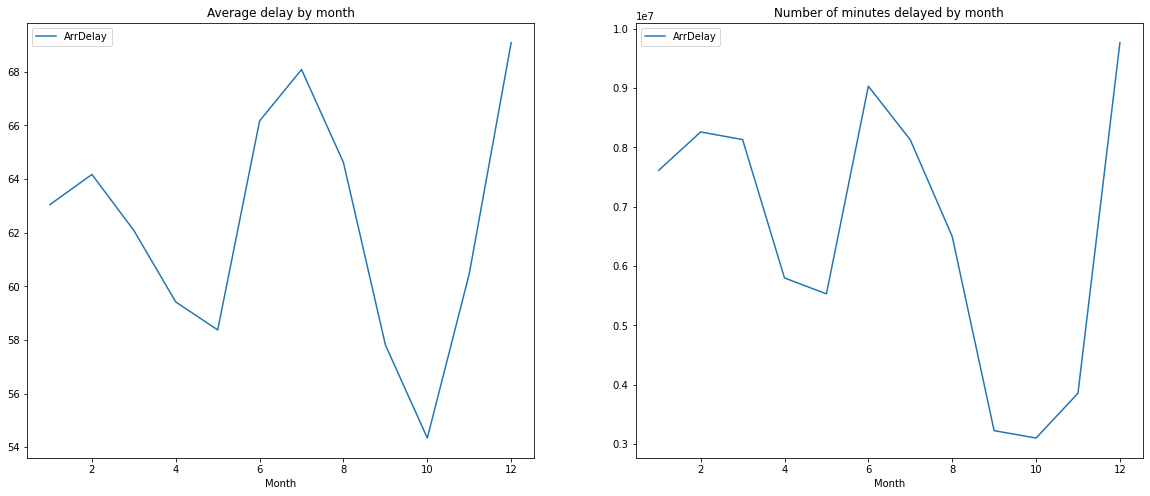

In [13]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Delayedflights[['Month','ArrDelay']].groupby(['Month']).mean().plot(ax=ax[0])
ax[0].set_title('Average delay by month')
Delayedflights[['Month','ArrDelay']].groupby(['Month']).sum().plot(ax=ax[1])
ax[1].set_title('Number of minutes delayed by month')
plt.show()

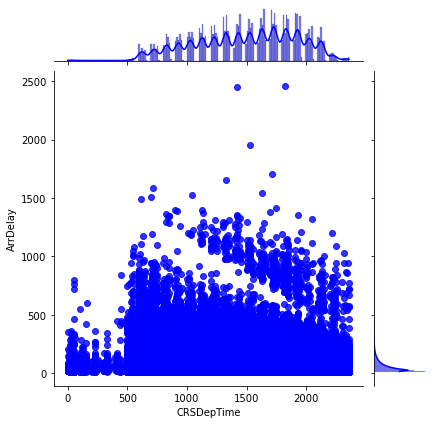

In [14]:
sns.jointplot(x='CRSDepTime',y='ArrDelay',data=Delayedflights,kind='reg', color='b',fit_reg = True)
plt.show()

### Delays focused on February, June and December, with a peak on average delays on July 2008.
### Regarding the time of the day the take off was programmed, it can be seen in the higher part of the scatterplot how the delays are concentrated in an hourly manner, focused on the hour. As the day goes on, there are more and more delays, but as it's shown in the center of the scatterplot, the delayed flights get divided into two groups: one with longer delays and other with shorter. One likely interpretation is that the delays generated by previous flights either increase or decrease in each following trip. 

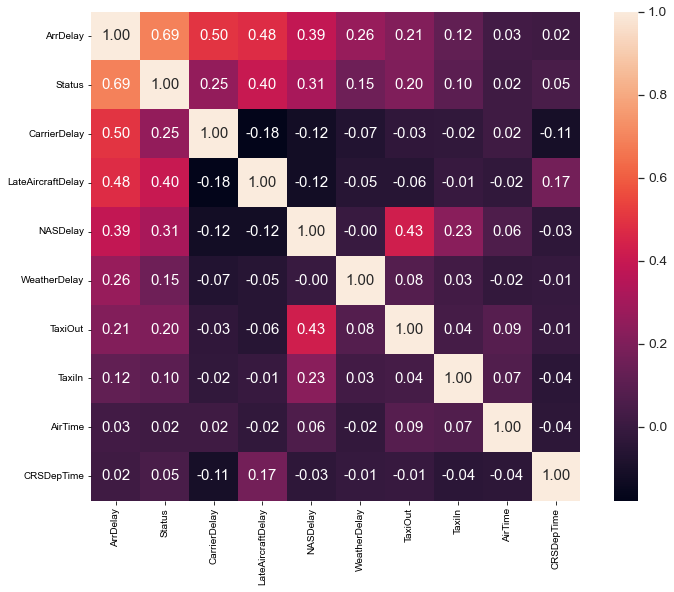

In [15]:
delcorrmat = Delayedflights.corr()

k = 10 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
cols = delcorrmat.nlargest(k, 'ArrDelay')['ArrDelay'].index
cm = np.corrcoef(Delayedflights[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\ruthv\AppData\Local\Temp/ipykernel_21908/3129500917.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df2.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()


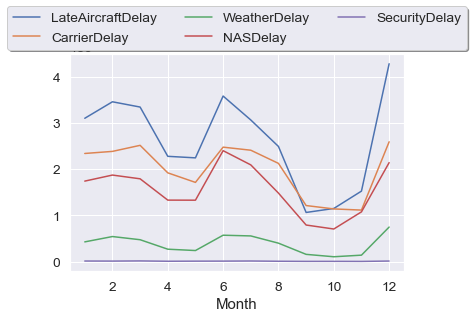

In [16]:
df2 = Delayedflights.filter(['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
df2 = df2.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()

### The correlation matrix identifies three main variables for delays: Late Aircraft Delay, Carrier Delay and NAS Delay. The graph corroborates this assumption, showing how those three variables create most of delays during the year. The variable Status can't be taken into account since it has been created 'ad hoc' and by it's own definition has a high correlation. 

C:\Users\ruthv\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


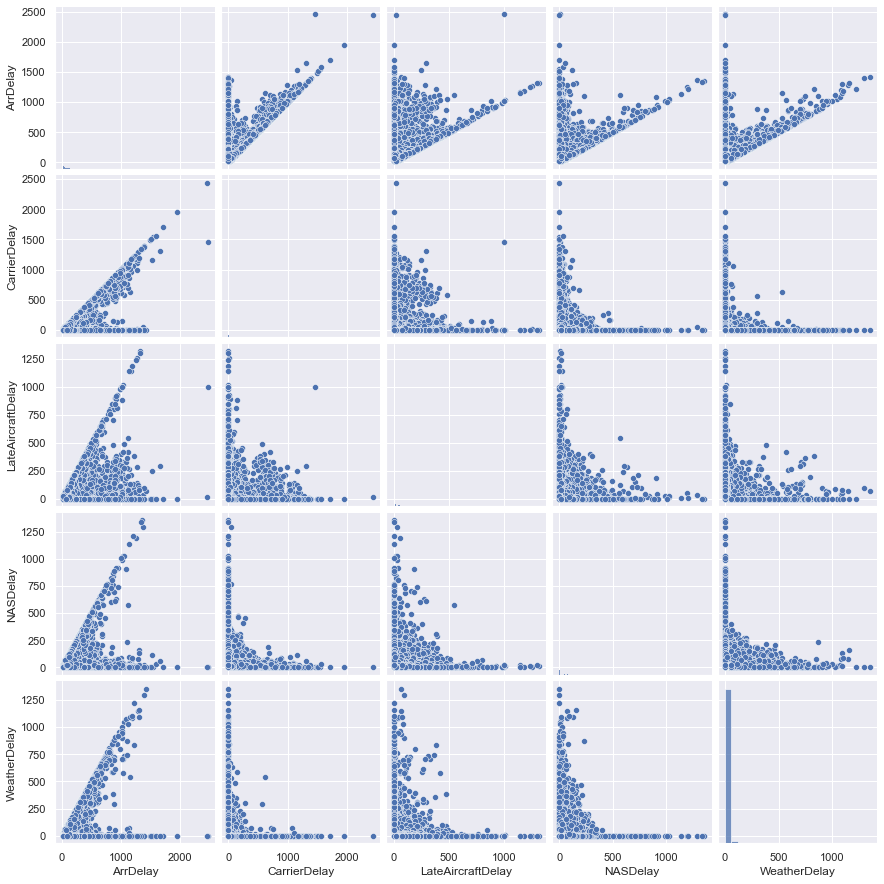

In [17]:
#scatterplot
sns.set()
cols = ['ArrDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay']
sns.pairplot(Delayedflights[cols], size = 2.5)
plt.show()

## 2.2.1 Late Aircraft Delay
### Late Aircraft Delay seems to be the most important variable, not only due to its longer wait periods, but it's affected by the others due to the ripple effect and delay propagation. Its distribution is almost parallel to NAS Delay, and seems to be the compounded effect of the other delays minus the delay reduction from the alloted Elapsed time > Actual Elapsed Time in the flight operations. 

### However, analyzing the scatterplot, it doesn't seem to be a significant correlation between the types of delay themselves. A more in depth analysis, following the exact routes of the aircrafts and their connections and subsequent flights could help identifying the exact root cause to each delay, but that is not within the scope of this analysis.

## 2.2.2 Carrier Delays 

In [18]:
print(flights['UniqueCarrier'].value_counts())

WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: UniqueCarrier, dtype: int64


C:\Users\ruthv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ruthv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


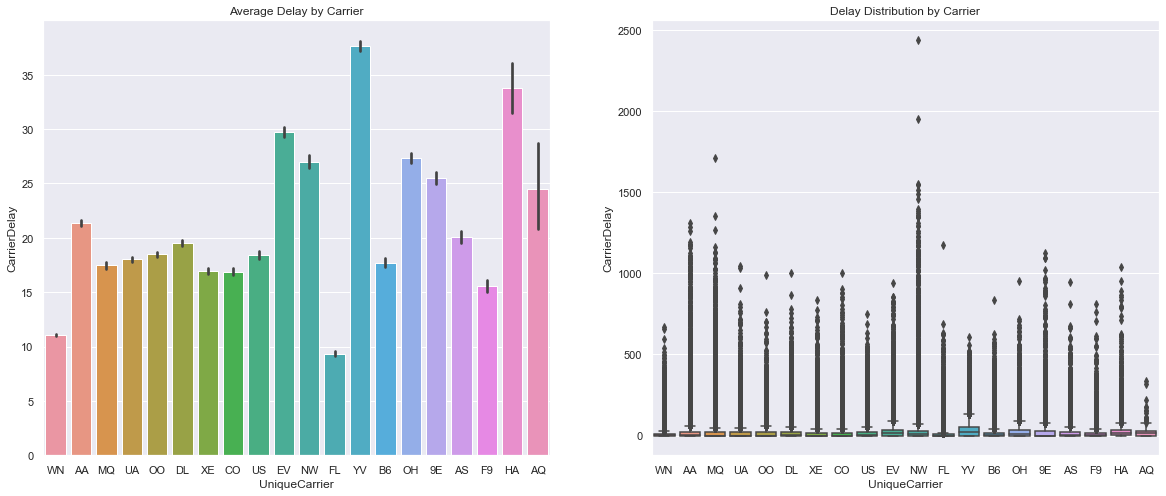

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines']


In [19]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('UniqueCarrier','CarrierDelay', data=Delayedflights,ax=ax[0], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[0].set_title('Average Delay by Carrier')
sns.boxplot('UniqueCarrier','CarrierDelay', data=Delayedflights,ax=ax[1], order=['WN', 'AA', 'MQ', 'UA','OO','DL','XE','CO',
                                                                                'US','EV', 'NW','FL','YV', 'B6','OH','9E',
                                                                                 'AS','F9','HA','AQ'])
ax[1].set_title('Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines','US: US Airways',
       'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])

### 4 from the top 5 companies in the domestic market (Southwest Airlines (WN), American Eagle Airlines (MQ), United Airlines (UA) and Skywest Airlines (OO) create an average delay below the mean (19 minutes). Southwest Airlines, with an outstanding 11.7 minutes per flight, the second lowest of all the carriers. 

### Carriers with higher average delay generation are Mesa Airlines (YV) with 37.63 minutes per flight, Hawaian Airlines (HA) with 33.76 minutes per flight and ExpressJet (EV) with 29,70. As we go from left to right in the barplot, it can be seen how airlines with lower volumen of flights tend to have a higher Carrier Delay (with the exception of AirTrans, integrated into Southwest in 2014); so it seems like size matters.

### On the other hand, taking responsibility of a higher number of flights results in a higher chance of having an extreme waiting situation. Northwest, American Eagle and American Airlines registered the maximum Carrier Delay for 2008.

## 2.2.3   NAS Delay

In [20]:
#Having more than 300 airports on the dataset, we are going to focus on the top20. 
Top20airports = Delayedflights[(Delayedflights.Origin == 'ORD') | (Delayedflights.Origin == 'ATL') |
                               (Delayedflights.Origin == 'DFW') | (Delayedflights.Origin == 'DEN') |
                               (Delayedflights.Origin == 'EWR') | (Delayedflights.Origin == 'LAX') | 
                               (Delayedflights.Origin == 'IAH') | (Delayedflights.Origin == 'PHX') |
                               (Delayedflights.Origin == 'DTW') | (Delayedflights.Origin == 'SFO') | 
                               (Delayedflights.Origin == 'LAS') | (Delayedflights.Origin == 'DEN') |
                               (Delayedflights.Origin == 'ORD') | (Delayedflights.Origin == 'JFK') | 
                               (Delayedflights.Origin == 'CLT') | (Delayedflights.Origin == 'LGA') |
                               (Delayedflights.Origin == 'MCO') | (Delayedflights.Origin == 'MSP') | 
                               (Delayedflights.Origin == 'BOS') | (Delayedflights.Origin == 'PHL')]

print(Top20airports['Origin'].value_counts())

ORD    90611
ATL    87741
DFW    62073
DEN    46477
EWR    36115
LAX    33713
IAH    33166
PHX    31002
DTW    30732
SFO    30110
LAS    30041
JFK    23870
CLT    23318
LGA    22807
MCO    22290
MSP    22149
BOS    19816
PHL    19302
Name: Origin, dtype: int64


C:\Users\ruthv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ruthv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


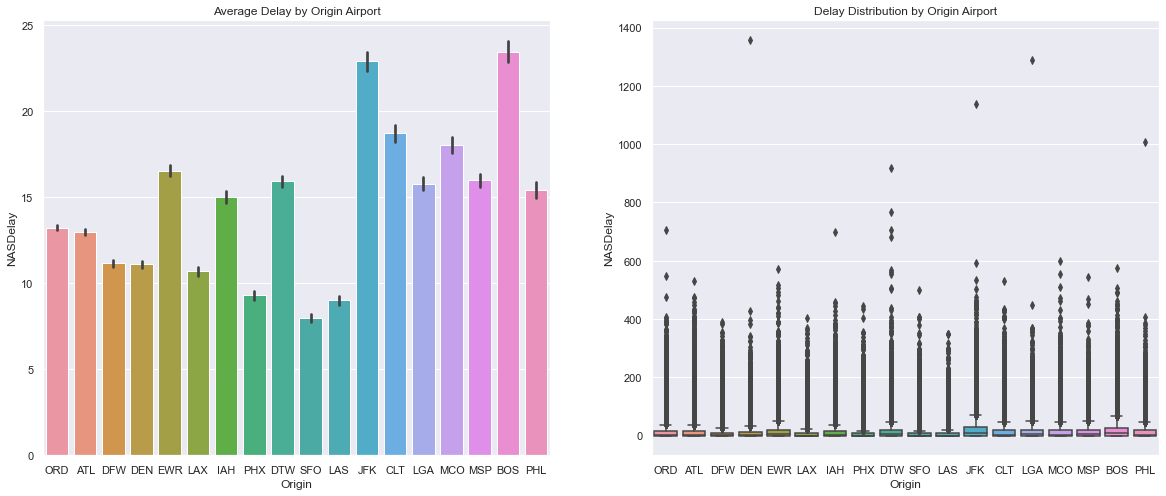

['ORD: Chicago', 'ATL: Atlanta', 'DFW: Dallas Fortworth', 'DEN: Denver', 'EWR: Newark', 'LAX: Los Ángeles', 'IAH: Houston', 'PHX: Phoenix', 'DTW: Detroit', 'SFO: San Francisco', 'LAS: Las Vegas', 'JFK: New York', 'CLT: Charlotte', 'LGA: La Guardia (NY)', 'MCO: Orlando', 'MSP: Minneapolis', 'BOS Boston', 'PHL Philadelphia']


In [21]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Origin','NASDelay', data=Top20airports,ax=ax[0], order=['ORD', 'ATL', 'DFW', 'DEN','EWR','LAX','IAH','PHX','DTW',
                                                                     'SFO', 'LAS','JFK','CLT', 'LGA','MCO','MSP','BOS','PHL'])
ax[0].set_title('Average Delay by Origin Airport')
sns.boxplot('Origin','NASDelay', data=Top20airports,ax=ax[1], order=['ORD', 'ATL', 'DFW', 'DEN','EWR','LAX','IAH','PHX','DTW',
                                                                     'SFO', 'LAS','JFK','CLT', 'LGA','MCO','MSP','BOS','PHL'])
ax[1].set_title('Delay Distribution by Origin Airport')
plt.close(2)
plt.show()

print(['ORD: Chicago', 'ATL: Atlanta', 'DFW: Dallas Fortworth', 'DEN: Denver','EWR: Newark','LAX: Los Ángeles',
       'IAH: Houston','PHX: Phoenix','DTW: Detroit','SFO: San Francisco','LAS: Las Vegas','JFK: New York','CLT: Charlotte',
       'LGA: La Guardia (NY)','MCO: Orlando','MSP: Minneapolis','BOS Boston','PHL Philadelphia'])

### There seems to be a correlation between the number of flights operated and NASDelay, with the exceptions of Newark (EWR), Houston (IAH) and Detroit (DTW). From Chicago Airport  (ORD) to Las Vegas (LAS) a descending average NASDelay per flight can be seen. In less busy airports (less than 30.000 flights per year), delays increase once again. This seems to entail that there are two sizes of airport, and that the size,  the number of flights are correlated with the delays.  

### While this tendency might be true in some cases, this reasoning is flawed. The dataset is limited to domestic flights, but airports like LAX, JFK and Atlanta have a higher operations volume due to being notorious international airports, so we advise taking the conclusions with a pinch of salt. 

# 3. The situation today

### So far, we have seen causes for flight delay in 2008, but has the situation changed since then? 8 years later, in 2016, the ratio of domestic fligths in the US data offers a much brighter present. Numbers can be checked [here](https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?pn=1). 

## Making a comparison between then and now, we can see how the numbers have improved (*): 

### On time: 35,2% in 2008 vs 81,42% in 2016.
### Delayed: 64,4% in 2008 vs 17,17% in 2016.
### Cancelled: 0,03% in 2008 vs 1,17% in 2016. 
### Diverted: 0,4% in 2008 vs 0,24% in 2016. 


#### (*) After searching for the reason behind this significant improvement in the last 8 years, we have compared the data offered on the BTS website for 2008 and 2016 and our dataset. The BTS ratios are based on datasets containing the averages by air carrier and origin airport, and they don't compare individual flights. Their sample consider nearly 20.000 flights. Our dataset, in comparison, contains around 2 million individual flights. 
#### The BTS data for 2008 is 76,04% flights on time, 21,75% delayed, 1,96% cancelled and 0,25% diverted. Taking into account these ratios, in the period between 2008 and 2016, there has been a 7% increase in the number of flights on time, an average of 0.875% each year. However, there's still a lot of room for improvement.

AIRLINE DELAY IN PYTHON

In [22]:
#import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import dataframe_image as dfi
from functools import reduce #
from datetime import datetime, timedelta
from scipy.stats import chi2_contingency
from functools import reduce #import reduce from functools

In [23]:
#read data
airports = pd.read_csv("airports.csv") #airport variables
carriers = pd.read_csv("carriers.csv") #carrier variables
airplanes = pd.read_csv("plane-data.csv") #airplane variables

df1 = pd.read_csv("C:/Users/ruthv/Music/2006.csv") #import data for year 2006
df2 = pd.read_csv("C:/Users/ruthv/Music/2007.csv") #import data for year 2007
df3 = pd.read_csv("C:/Users/ruthv/Music/2008.csv") #import data for year 2008

<AxesSubplot:>

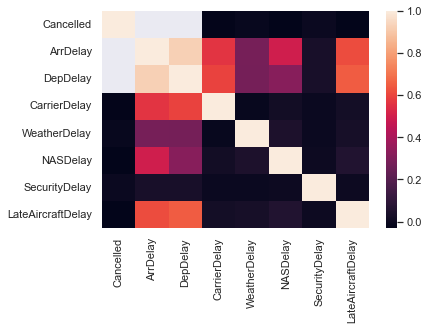

In [24]:
#check for correlation between cancalation and delays 

#merge dataframes for 2006 and 2007
cancel_org = pd.concat([df1, df2],ignore_index=True) #we can also use to verify NA's later.

#select columns of interest
cancel=cancel_org[['Cancelled','CancellationCode','ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]

#correlation heatmap (check how cancelations are correlated to delays)
cancel_heatm = sns.heatmap(cancel.corr()) #plot the heatmap
cancel_heatm
#cancel_heatm.figure.savefig("clean_plot1.png") #save to img

In [25]:
#the heatmap suggest a very strong correlation

#narrow in on the issue
cancel2 = cancel[['Cancelled','CancellationCode','ArrDelay','DepDelay']]
cancel2=cancel2[cancel2['Cancelled']==1] #  select only cancelled flights

#explore cancelation data
print(cancel2)
print(cancel2.isna().sum()) #sum of NA's

#As we suspected, if a flight is cancelled then there is no delay entry. Hence we should only select data without cancelled flights.


          Cancelled CancellationCode  ArrDelay  DepDelay
11                1                A       NaN       NaN
52                1                C       NaN       NaN
70                1                C       NaN       NaN
74                1                C       NaN       NaN
99                1                C       NaN       NaN
...             ...              ...       ...       ...
14595045          1                B       NaN       NaN
14595046          1                B       NaN       NaN
14595052          1                B       NaN       NaN
14595053          1                B       NaN       NaN
14595121          1                B       NaN       NaN

[282682 rows x 4 columns]
Cancelled                0
CancellationCode         0
ArrDelay            282682
DepDelay            282682
dtype: int64


In [26]:
#dataframes without cancelled flights.
df1=df1[df1['Cancelled']==0] 
df2=df2[df2['Cancelled']==0] 

#Similarly if a plane is diverted, then arrival delay entry should be impossible.
#remaining NA values corresponds to diverted in the same way as cancelled.
print(df1.ArrDelay.isna().sum()) #sum of NA's
print(df1.DepDelay.isna().sum()) #sum of NA's
print(df2.ArrDelay.isna().sum()) #sum of NA's
print(df2.DepDelay.isna().sum()) #sum of NA's

16186
0
17179
0


<AxesSubplot:>

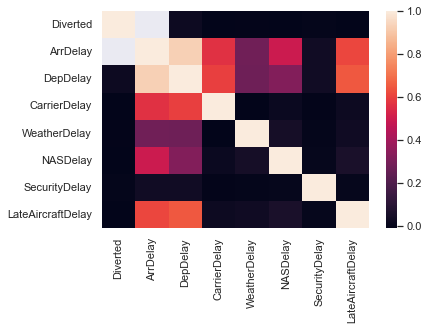

In [27]:
#heatmap of correlation between diverted and delays

#columns of interest
diverted=cancel_org[['Diverted','CancellationCode','ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]

#correlation heatmap
diverted_heatm = sns.heatmap(diverted.corr()) #plot the heatmap
diverted_heatm
#diverted_heatm.figure.savefig("clean_plot2.png") #save to img

In [28]:
#again we see a very strong correlation. so we select non-diverted flights.

#dataframes without diverted flights.
df1=df1[df1['Diverted']==0] 
df2=df2[df2['Diverted']==0] 

#if our assumption regarding diverted is true, NA's should excluded from ArrDelay and DepDelay
print(df1.ArrDelay.isna().sum()) #sum of NA's
print(df1.DepDelay.isna().sum()) #sum of NA's
print(df2.DepDelay.isna().sum()) #sum of NA's
print(df2.ArrDelay.isna().sum()) #sum of NA's

0
0
0
0


In [29]:
#merge data (exclude 2008 to avoid bias towards the first 4 months)
df = pd.concat([df1, df2],ignore_index=True)

#verify that missing values in cancelled is taken care of
print(df['Cancelled'].sum())

#test against original data
print(cancel_org['Cancelled'].sum())

0
282682


In [30]:
#merge df with carrier variables to get names of airlines
df = pd.merge(df, carriers,  how='inner', left_on=['UniqueCarrier'], right_on = ['Code'])

#rename Description column to Carrier
df.rename(columns={'Description': 'Carrier'}, inplace=True)

#create columns
df['delay'] = ((df['DepDelay'])+(df['ArrDelay'])) #total delay column for a flight (Departure + Arrival delay)
df['dep_hour_standard'] = df['DepTime']/100*1.0386100 #departure standard time column
df['Date']= pd.to_datetime(pd.DataFrame({'year':df['Year'],
                                         'month':df['Month'],'day':df['DayofMonth'], 
                                         'hour':df['dep_hour_standard']})) #date column

df['dep_hour_int'] = (df['DepTime']/100).astype(int) #departure time column (in integer)
df['Date_bin']= pd.to_datetime(pd.DataFrame({'year':df['Year'],
                                             'month':df['Month'],'day':df['DayofMonth'], 
                                             'hour':df['dep_hour_int']})) #date column in bins

df.head() #explore new columns

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,NASDelay,SecurityDelay,LateAircraftDelay,Code,Carrier,delay,dep_hour_standard,Date,dep_hour_int,Date_bin
0,2006,1,11,3,743,745,1024,1018,US,343,...,0,0,0,US,US Airways Inc. (Merged with America West 9/05...,4,8,2006-01-11 07:43:00.740280,7,2006-01-11 07:00:00
1,2006,1,11,3,1053,1053,1313,1318,US,613,...,0,0,0,US,US Airways Inc. (Merged with America West 9/05...,-5,11,2006-01-11 10:56:11.627880,10,2006-01-11 10:00:00
2,2006,1,11,3,1915,1915,2110,2133,US,617,...,0,0,0,US,US Airways Inc. (Merged with America West 9/05...,-23,20,2006-01-11 19:53:21.773400,19,2006-01-11 19:00:00
3,2006,1,11,3,1753,1755,1925,1933,US,300,...,0,0,0,US,US Airways Inc. (Merged with America West 9/05...,-10,18,2006-01-11 18:12:24.599880,17,2006-01-11 17:00:00
4,2006,1,11,3,824,832,1015,1015,US,765,...,0,0,0,US,US Airways Inc. (Merged with America West 9/05...,-8,9,2006-01-11 08:33:29.327040,8,2006-01-11 08:00:00


In [31]:
#details of delay related columns
del_info = df[['ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay',
               'LateAircraftDelay','delay']] #select columns
del_info.rename(columns={'ArrDelay': 'Arrival delay', 'DepDelay': 'Departure Delay',
                         'CarrierDelay':'Carrier Delay','WeatherDelay':'Weather Delay',
                         'NASDelay': 'NAS Delay', 'SecurityDelay': 'Security Delay',
                         'LateAircraftDelay':'Late Aircraft Delay',
                         'delay':'Total Delay'}, inplace=True) #rename columns
del_info = del_info.describe().T #describe and transpose delay information

#export to image 
del_info_style = del_info.style.format("{:.12}").background_gradient() #style table
dfi.export(del_info_style,"EDA_table1.png") #export to img
del_info_style

C:\Users\ruthv\AppData\Local\Temp/ipykernel_21908/2086302600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del_info.rename(columns={'ArrDelay': 'Arrival delay', 'DepDelay': 'Departure Delay',


,count,mean,std,min,25%,50%,75%,max
Arrival delay,14279090.0,9.45185883694,38.0001042195,-592.0,-9.0,-1.0,13.0,2598.0
Departure Delay,14279090.0,10.7229602167,34.7911313699,-1200.0,-4.0,0.0,10.0,2601.0
Carrier Delay,14279090.0,3.71618415459,20.0820845703,0.0,0.0,0.0,0.0,2580.0
Weather Delay,14279090.0,0.741888453676,9.18507203545,0.0,0.0,0.0,0.0,1429.0
NAS Delay,14279090.0,3.76854974652,16.0764059994,0.0,0.0,0.0,0.0,1392.0
Security Delay,14279090.0,0.0278923236705,1.1963587386,0.0,0.0,0.0,0.0,382.0
Late Aircraft Delay,14279090.0,4.91983438721,20.8123003684,0.0,0.0,0.0,0.0,1366.0
Total Delay,14279090.0,20.1748190536,71.4313872006,-1196.0,-12.0,-1.0,22.0,5199.0


In [32]:
#explore departure delays (i.e. outlier, etc.)
print(df["DepDelay"][(df["DepDelay"] <0)].count())
print(df["DepDelay"][(df["DepDelay"] < -1000)].count())
print(df["DepDelay"][(df["DepDelay"] >2000)].count())

#explore arrival delays
print(df["ArrDelay"][(df["ArrDelay"] <0)].count())
print(df["ArrDelay"][(df["ArrDelay"] < -400)].count())
print(df["ArrDelay"][(df["ArrDelay"] >2000)].count())

6858617
42
1
7189951
12
1


In [33]:
#total no. of flights ontime, and delayed
delay_perc = (df['delay']<=0) #true: before or ontime, false: delayed
delay_perc.value_counts() #count

True     7615236
False    6663854
Name: delay, dtype: int64

In [34]:
#manual math cell: percentage of delayed flights
tot_flights = (6534546+7473058)
del_flights = 6534546
ont_flights = 7473058
perc=del_flights/tot_flights
perc2=ont_flights/tot_flights
print("Percentage of flights that are delayed: {:.00%}".format(perc))
print("Percentage of flights that are ontime: {:.00%}".format(perc2))

Percentage of flights that are delayed: 47%
Percentage of flights that are ontime: 53%


In [35]:
#change the total delay threshold to 10 minutes:
delay_perc2 = (df['delay']<=10) #10 min delay or less.
delay_perc2.value_counts() #count

True     9514521
False    4764569
Name: delay, dtype: int64

In [36]:
#manual math cell: percentage of delayed flights (10min  threshold)
tot_flights = (4671113+9336491)
del_flights = 4671113
ont_flights = 9336491
perc=del_flights/tot_flights
perc2=ont_flights/tot_flights
print("Percentage of flights that are delayed: {:.00%} - (10min threshold)".format(perc))
print("Percentage of flights that are ontime: {:.00%} - (10min threshold)".format(perc2))

Percentage of flights that are delayed: 33% - (10min threshold)
Percentage of flights that are ontime: 67% - (10min threshold)


In [37]:
#set plotting style for notebook
sns.reset_orig()
plt.style.use('seaborn-colorblind')
sns.set_style("whitegrid")

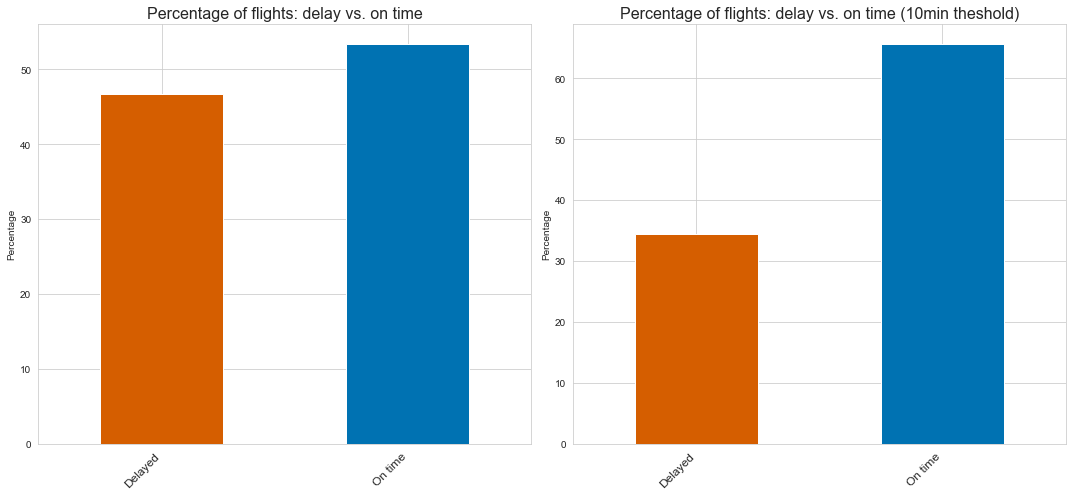

In [38]:
#plot delays

#data prep for plot
#percentage of delays converted to true/false values
delay_perc_plot = pd.DataFrame() #empty df
delay_perc_plot['Status']=df['delay']<=0 #column with delay status
for col in delay_perc_plot.columns[delay_perc_plot.dtypes == 'bool']:
    delay_perc_plot['Status'] = delay_perc_plot['Status'].map({True: 'On time', False: 'Delayed'}) #convert to boolean

#percentage of delays with a 10 min threshold (true/false)
delay_perc_plot_10 = pd.DataFrame() #cempty df
delay_perc_plot_10['Status_10min_int']=df['delay']<10 #10min threshold
for col in delay_perc_plot_10.columns[delay_perc_plot_10.dtypes == 'bool']:
    delay_perc_plot_10['Status_10min_int'] = delay_perc_plot_10['Status_10min_int'].map({True: 'On time', False: 'Delayed'}) #convert to boolean


#combined plot
f, ax = plt.subplots(1,2,figsize=(15, 7))

palette=['C2','C0'] #set colour

(delay_perc_plot['Status'].value_counts(normalize=True)*100).sort_values().plot(kind = 'bar', ax=ax[0], color=palette) #plot in percentage
(delay_perc_plot_10['Status_10min_int'].value_counts(normalize=True)*100).sort_values().plot(kind = 'bar', ax=ax[1], color=palette) #plot in percentage
#set labels
ax[0].set_title("Percentage of flights: delay vs. on time",fontsize = 16) #title ax0
plt.setp(ax[0].get_xticklabels(), rotation=45, ha='right',fontsize = 12) #rotate ax0
ax[0].set(ylabel="Percentage")
ax[1].set_title("Percentage of flights: delay vs. on time (10min theshold)",fontsize = 16) #title ax1
plt.setp(ax[1].get_xticklabels(), rotation=45, ha='right',fontsize = 12) #rotate ax1
ax[1].set(ylabel="Percentage")
plt.tight_layout() #tight layout
plt.style.use('seaborn-colorblind')
plt.show() #plot

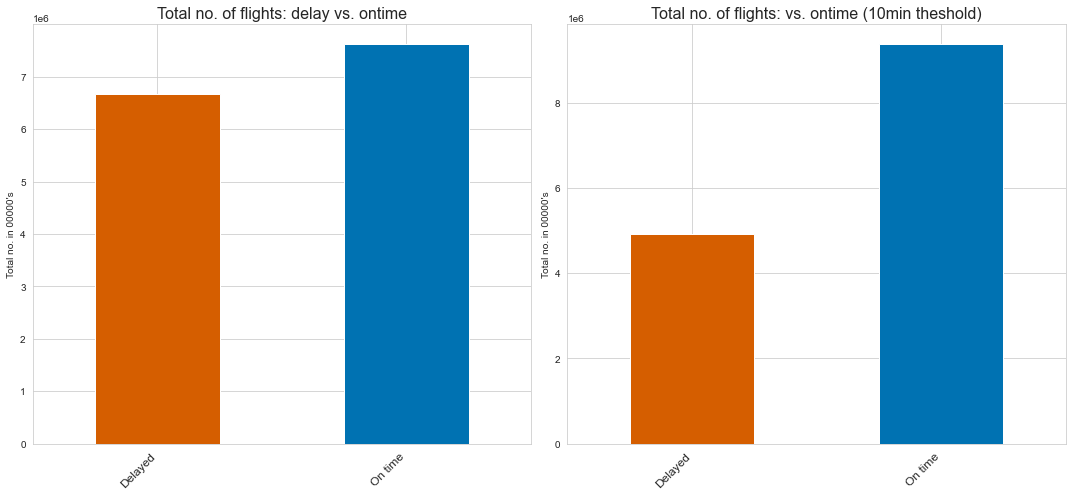

In [39]:
#plot delays (total)

#data prep for plot
#total delay converted to true/false values
delay_tot_plot = pd.DataFrame() #empty df
delay_tot_plot['Status']=df['delay']<=0 #0 min threshold
for col in delay_tot_plot.columns[delay_tot_plot.dtypes == 'bool']:
    delay_tot_plot['Status'] = delay_tot_plot['Status'].map({True: 'On time', False: 'Delayed'}) #convert to boolean

#total delay 10min threshold
delay_tot_plot_10 = pd.DataFrame() #empty df
delay_tot_plot_10['Status_10min_int']=df['delay']<10 #10 min threshold
for col in delay_tot_plot_10.columns[delay_tot_plot_10.dtypes == 'bool']:
    delay_tot_plot_10['Status_10min_int'] = delay_tot_plot_10['Status_10min_int'].map({True: 'On time', False: 'Delayed'})

#plot of total delays
f, ax = plt.subplots(1,2,figsize=(15, 7))

palette=['C2','C0'] #color

(delay_tot_plot['Status'].value_counts()).sort_values().plot(kind = 'bar', ax=ax[0], color=palette)
(delay_tot_plot_10['Status_10min_int'].value_counts()).sort_values().plot(kind = 'bar', ax=ax[1], color=palette)

#set labels
ax[0].set_title("Total no. of flights: delay vs. ontime",fontsize = 16) #title ax0
plt.setp(ax[0].get_xticklabels(), rotation=45, ha='right',fontsize = 12) #rotate ax0
ax[1].set_title("Total no. of flights: vs. ontime (10min theshold)",fontsize = 16) #title ax1
plt.setp(ax[1].get_xticklabels(), rotation=45, ha='right',fontsize = 12) #rotate ax1
plt.setp(ax, ylabel="Total no. in 00000's") #common y label.
plt.tight_layout() #tight layout
plt.show() #plot

In [40]:
#value count of both delay df's
print(delay_tot_plot.value_counts())
print(delay_tot_plot_10.value_counts())

Status 
On time    7615236
Delayed    6663854
dtype: int64
Status_10min_int
On time             9365735
Delayed             4913355
dtype: int64


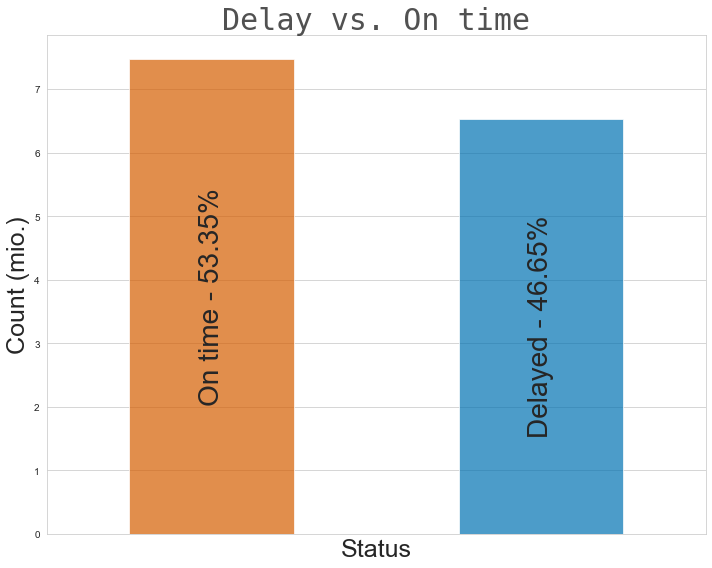

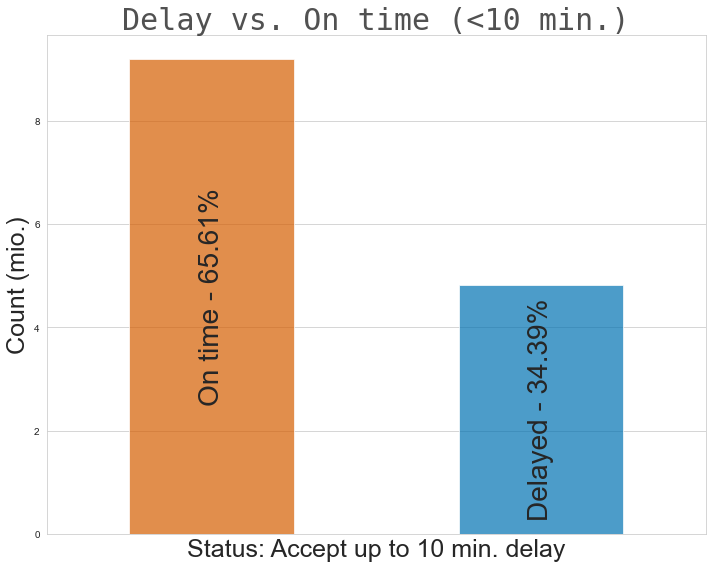

In [41]:
#merge and prettify the plots above

#plot data preparation
delay_dec_data=[7.473081,6.534523] #totals divided with 1000: fit plot to graph
delay_dec = pd.Series(index = ["On time", "Delayed"], data=delay_dec_data) #create series
percentage = delay_dec.div(delay_dec.sum()).mul(100).round(2) #calc. the percentage

#barplot with total and percentage in a combined plot (0 min threshold)
ax = delay_dec.plot(kind="bar", alpha=0.7, figsize=(10, 8), color=palette)

#set labels inside the bars
labels = [f'{delay_dec} - {percentage[delay_dec]}%' for delay_dec in delay_dec.index]
for label, a in zip(labels, ax.patches):
    left, bottom, width, height = a.get_bbox().bounds
    ax.annotate(label, xy=(left+width/2, bottom+height/2), ha='center', va='center', rotation=90, fontsize=28)
#labels
plt.ylabel("Count (mio.)", fontsize=25) #ylabel
plt.xlabel("Status", fontsize=25) #xlabel
plt.title("Delay vs. On time", fontsize=30, fontname="Monospace", alpha=.8) #title
plt.xticks([]) #empty xticks
plt.tight_layout(rect=[0, 0, 1, 1]) #tight layout (rectangular)
plt.savefig('EDA_plot1.png', bbox_inches='tight') #save img
plt.show()

#barplot with total and percentange in combined plot (10 min threshold)
delay_dec_data2=[9.190188,4.817416] #totals divided with 1000: to fit plot to graph
delay_dec2 = pd.Series(index = ["On time", "Delayed"], data=delay_dec_data2) #series
percentage2 = delay_dec2.div(delay_dec.sum()).mul(100).round(2) #calculate percent

#plot pretty bar for 10min threshold
ax = delay_dec2.plot(kind="bar",  alpha=0.7, figsize=(10, 8), color=palette)

#bar labels
labels = [f'{delay_dec2} - {percentage2[delay_dec2]}%' for delay_dec2 in delay_dec2.index]
for label, a in zip(labels, ax.patches):
    left, bottom, width, height = a.get_bbox().bounds
    ax.annotate(label, xy=(left+width/2, bottom+height/2), ha='center', va='center', rotation=90, fontsize=28)
#labels
plt.ylabel("Count (mio.)", fontsize=25) #ylabel
plt.xlabel("Status: Accept up to 10 min. delay", fontsize=25) #xlabel
plt.title("Delay vs. On time (<10 min.)", fontsize=30, fontname="Monospace", alpha=.8) #title
plt.xticks([]) #empty xticks
plt.tight_layout(rect=[0, 0, 1, 1]) #tight layout
plt.savefig('EDA_plot2.png', bbox_inches='tight') #save img
plt.show()

C:\Users\ruthv\AppData\Local\Temp/ipykernel_21908/3729033357.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) #yticks in percentage


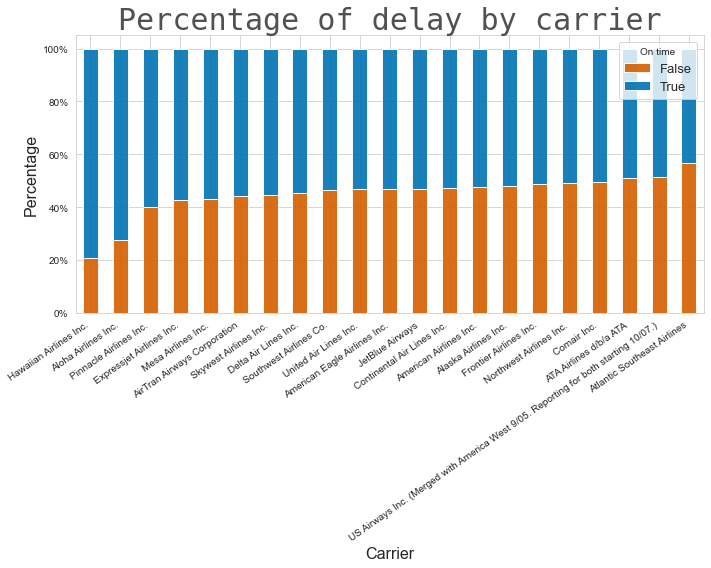

In [42]:
#plot of delay for each carrier (stacked barchart)

#data prep for plot
carier_delay_perc_plot = pd.DataFrame() #empty df
carier_delay_perc_plot['Carrier']=df['Carrier'] #carrier variable with full names
carier_delay_perc_plot['ontime']=df['delay']<=0 #on time vs. delay
carier_delay_perc_plot = carier_delay_perc_plot.groupby(['Carrier',
                                                           'ontime']).size().unstack(1) #shape and class data
carier_delay_perc_plot = carier_delay_perc_plot.div(carier_delay_perc_plot.sum(axis=1), axis=0) #percentage

#plot
f, ax = plt.subplots(figsize=(10, 8))
carier_delay_perc_plot.sort_values(by=False).plot(kind="bar", 
                                                  alpha=.9, stacked=True, ax=ax,color = palette) #stacked bar plot
#set labels
ax.set_title("Percentage of delay by carrier",fontsize = 30, fontname="Monospace", alpha=.8) #title
plt.xlabel('Carrier', fontsize = 16) #xlabel
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") #rotate xlabel
plt.ylabel("Percentage", fontsize = 16) #ylabel
ax.legend(loc='upper right', title='On time', fontsize = 13)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) #yticks in percentage
plt.tight_layout(rect=[0, 0, 1, 1]) #tight rectangular layout
plt.savefig('EDA_plot3.png', bbox_inches='tight') #save img
plt.show() #plot

In [43]:
#create carrier total flights df
delay_carrier=df[['Carrier']].groupby("Carrier").count() #carrier column and group by count
delay_carrier['fligts']=df['Carrier'].value_counts() #total flights
delay_carrier = delay_carrier.reset_index(drop=False) #reset index

#carrier total delays df
delay_carrier2=(df[df['delay']>0]['Carrier'].value_counts()) #delayed
delay_carrier2=delay_carrier2.to_frame(name=('total delays')) #to df
delay_carrier2.index.name='Carrier' #set index name
delay_carrier2=delay_carrier2.reset_index(drop=False) #reset index

#merge to carrier delay df
delay_merge = delay_carrier.merge(delay_carrier2[['Carrier','total delays']],
                                  how='left',left_on='Carrier',right_on='Carrier')
delay_merge['percentage']=(delay_merge['total delays']/delay_merge['fligts']) #% delay column
delay_merge #explore new df

,Carrier,fligts,total delays,percentage
0,ATA Airlines d/b/a ATA,19365,9880,1
1,AirTran Airways Corporation,495080,219995,0
2,Alaska Airlines Inc.,313606,150053,0
3,Aloha Airlines Inc.,80584,22151,0
4,American Airlines Inc.,1245605,592462,0
5,American Eagle Airlines Inc.,1045006,490341,0
6,Atlantic Southeast Airlines,542456,308245,1
7,Comair Inc.,495066,244520,0
8,Continental Air Lines Inc.,625820,296066,0
9,Delta Air Lines Inc.,965602,437744,0


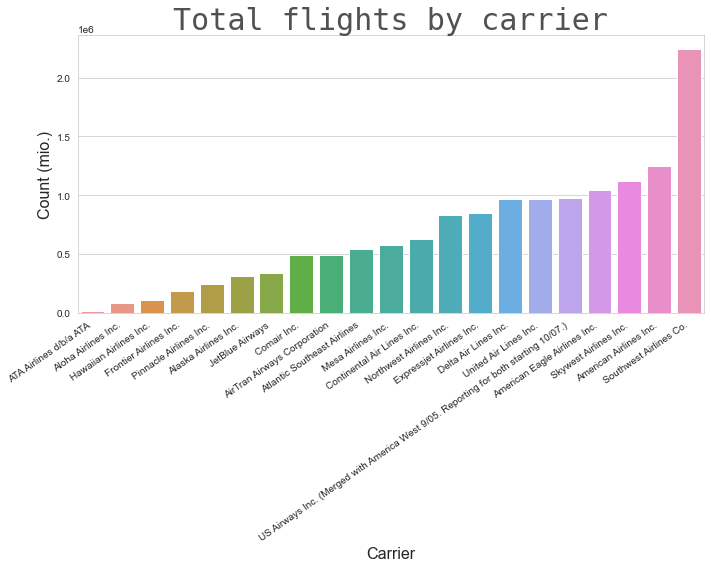

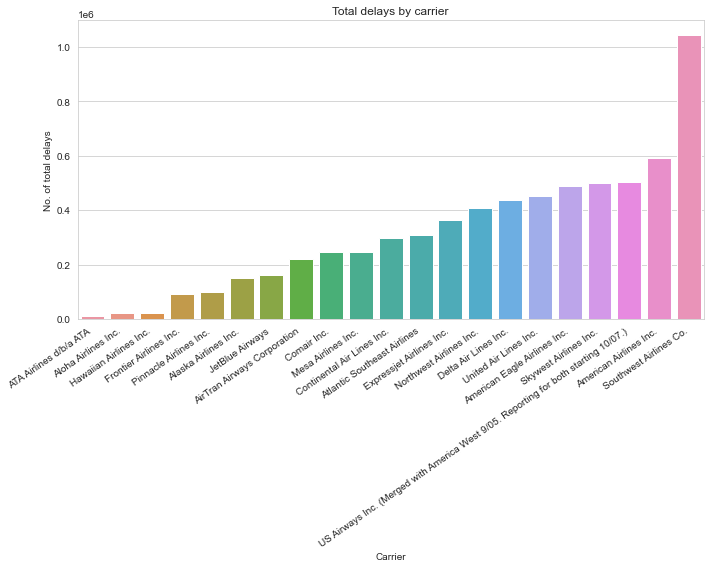

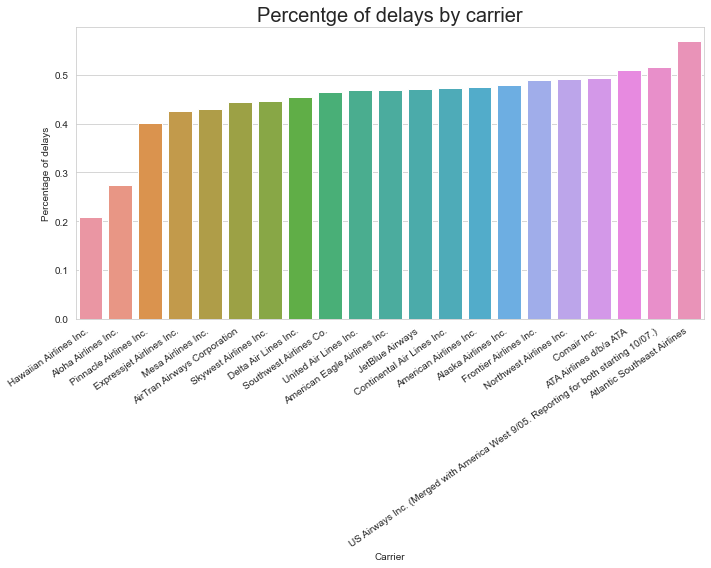

In [44]:
#multiple plots to gain better insight in delay by carrier.

#plot total flights by carrier (should show that Hawaiian has way less flights than big carriers)
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data= delay_merge.sort_values(by='fligts'),ax=ax, x=('Carrier'), y=('fligts'))
ax.set_title('Total flights by carrier',fontsize = 30, fontname="Monospace", alpha=.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") #rotate xlabel
ax.set_xlabel('Carrier',fontsize = 16)
ax.set_ylabel("Count (mio.)",fontsize = 16)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('EDA_plot4.png', bbox_inches='tight') #save img
plt.show() #plot

#plot total delays by carrier
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data= delay_merge.sort_values(by='total delays'),ax=ax, x=('Carrier'), y=('total delays'))
ax.set_title('Total delays by carrier')
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") #rotate xlabel
ax.set_xlabel('Carrier')
ax.set_ylabel('No. of total delays')
plt.tight_layout() #tight layout
plt.show() #plot

#plot percentage delays by carrier
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data= delay_merge.sort_values(by='percentage'),ax=ax, x=('Carrier'), y=('percentage'))
ax.set_title('Percentge of delays by carrier', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") #rotate xlabel
ax.set_xlabel('Carrier')
ax.set_ylabel('Percentage of delays')
plt.tight_layout() #tight layout
plt.show() #plot

In [ ]:
#merge df with airports, origin 
delay_by_airport = pd.merge(df, airports,  how='inner', left_on=['Origin'], right_on = ['iata'])
delay_by_airport #explore

In [ ]:
#create airport total flights df
delay_by_airport1 = delay_by_airport[['airport','iata']].groupby('airport').count()
delay_by_airport1.rename(columns={'iata': 'flights'}, inplace=True)
delay_by_airport1 = delay_by_airport1.sort_values(by=['flights'], ascending=False)
delay_by_airport1 = delay_by_airport1.reset_index(drop=False)

#carrier total delays df
delay_by_airport2=(delay_by_airport[delay_by_airport['delay']>0]['airport'].value_counts()) #delayed
delay_by_airport2=delay_by_airport2.to_frame(name=('total delays')) #to df
delay_by_airport2.index.name='airport' #set index name
delay_by_airport2=delay_by_airport2.reset_index(drop=False) #reset index

#merge to carrier delay df
delay_by_airport_merge = delay_by_airport1.merge(delay_by_airport2[['airport','total delays']],
                                  how='left',left_on='airport',right_on='airport')
delay_by_airport_merge['percentage']=(delay_by_airport_merge['total delays']/delay_by_airport_merge['flights']) #% delay column
delay_by_airport_merge = delay_by_airport_merge.head(10)
delay_by_airport_merge #explore new df

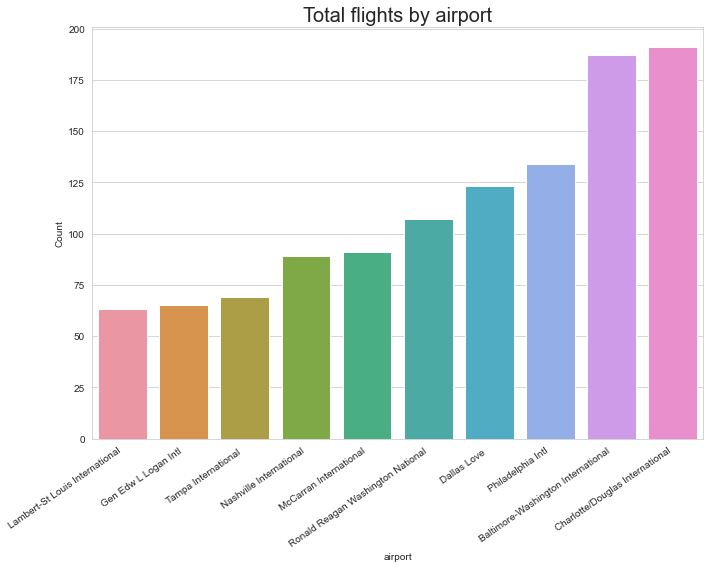

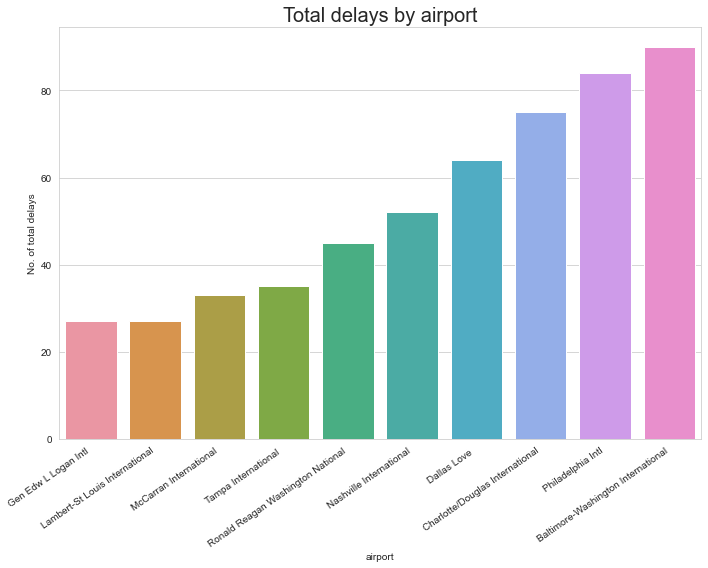

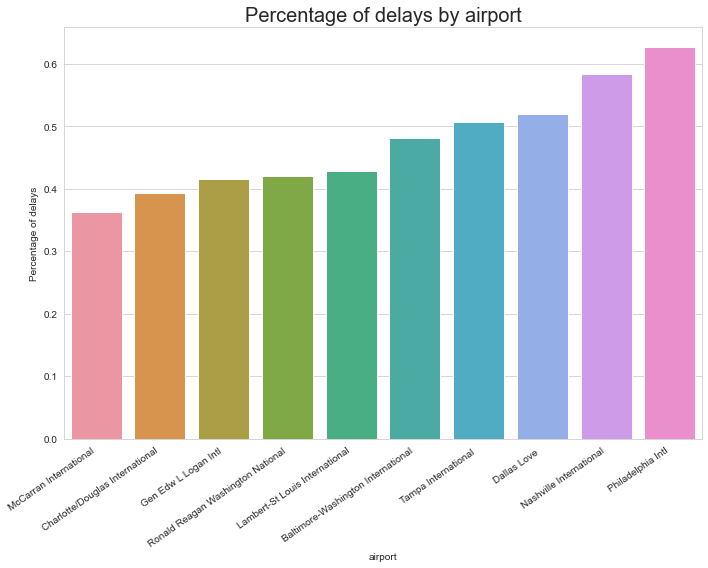

In [72]:
#multiple airport plots

#total flights 
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data= delay_by_airport_merge.sort_values(by='flights'),ax=ax, x=('airport'), y=('flights'))
ax.set_title('Total flights by airport', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") #rotate xlabel
ax.set_xlabel('airport')
ax.set_ylabel("Count")
plt.tight_layout()
plt.show() #plot

#total delay
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data= delay_by_airport_merge.sort_values(by='total delays'),ax=ax, x=('airport'), y=('total delays'))
ax.set_title('Total delays by airport', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") #rotate xlabel
ax.set_xlabel('airport')
ax.set_ylabel('No. of total delays')
plt.tight_layout() #tight layout
plt.show() #plot

#percentage of delays
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data= delay_by_airport_merge.sort_values(by='percentage'),ax=ax, x=('airport'), y=('percentage'))
ax.set_title('Percentage of delays by airport', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right") #rotate xlabel
ax.set_xlabel('airport')
ax.set_ylabel('Percentage of delays')
plt.tight_layout() #tight layout
plt.show() #plot

In [73]:
# 4. Questions

In [ ]:
### Question 4.1.1
1. When is the best day of the week to fly to minimise delays?

In [ ]:
#average delay in minutes by weekday (departure, arrival, and total delay)

#map days
df['DayOfWeek'] = df['DayOfWeek'].map({1:'Monday',2:'Tuesday',
                                       3:'Wednesday',4:'Thursday',5:'Friday',
                                       6:'Saturday',7:'Sunday'}).astype('str') #weekname column  
#create df with average values
day_mean=df[['DayOfWeek','DepDelay','ArrDelay']].groupby(['DayOfWeek']).mean() #mean delay by day
day_mean['Avg. delay']=(day_mean['DepDelay']+day_mean['ArrDelay'])/2 #avg. delay column
day_mean['Total avg. delay']=(day_mean['DepDelay']+day_mean['ArrDelay']) #tot. delay column
day_mean=day_mean.sort_values(by='Avg. delay',ascending=True) #arrange by avg. delay

#export table to img
day_mean = day_mean.reset_index(drop=False)
day_mean.rename(columns={'DayOfWeek': 'Day of Week', 'DepDelay': 
                         'Avg. Departure Delay','ArrDelay':
                         'Avg. Arrival Delay'}, inplace=True) #rename columns
day_mean_style = day_mean.style.background_gradient() #style table
dfi.export(day_mean_style,"Q1_1_table1.png") #export to png
day_mean_style #explore



In [ ]:
#plot bar chart mean delay delays total

#reset plot style for next to plots (to match color of bars)
sns.reset_orig()
sns.set_style("whitegrid")

f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data = day_mean.sort_values(by='Total avg. delay'), 
            ax=ax, alpha=.8, x=('Day of Week'), y=('Total avg. delay'))

ax.set_title('Average delay of weekday (min.)', fontsize=30, fontname="Monospace", alpha=.8) #title
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right", fontsize = 15) #rotate xlabel
ax.set_ylabel('Avg. delay (min)', fontsize = 20)
ax.set_xlabel(xlabel=None) #remove obvioius xlabel
plt.tight_layout(rect=[0, 0, 1, 1]) #tight layout rect
plt.savefig('Q1_1_plot1.png', bbox_inches='tight') #save png
plt.show() #plot

In [ ]:
#total flights/delays and percentage of delays by weekday (total delay)

#df with total no. of delay occrurences by weekday in percentage
day_total1=df[['DayOfWeek','delay']]
day_total1=df[['DayOfWeek','delay']].groupby(['DayOfWeek']).count() #group by day and count total per day.
day_total1['Flights(%)']=(day_total1['delay']/14007604)*100 #delay delays/ total flights in dataset
day_total1.rename(columns={'delay': 'Flights'}, inplace=True)

#total delays by weekday
day_total2 = df[['DayOfWeek','DepDelay','ArrDelay']]
day_total2 = (day_total2[(day_total2['DepDelay']>0) | (day_total2['ArrDelay']>0)])
day_total2.rename(columns={'DepDelay': 'Delays'}, inplace=True)
day_total2=day_total2.groupby(['DayOfWeek']).count()
day_total2.drop(['ArrDelay'], inplace=True, axis=1) #drop columns
day_total2

#merge on DayofWeek
day_total = pd.merge(day_total1, day_total2,  how='inner', left_on=['DayOfWeek'], 
                     right_on = ['DayOfWeek'])
day_total['Delays (%)'] = (day_total['Delays']/day_total['Flights']) #create delay in percentage column
day_total = day_total.sort_values(by='Delays (%)',ascending=True)#sort values

#prettify table
day_total = day_total.reset_index(drop=False)
day_total.rename(columns={'DayOfWeek': 'Day of Week'}, inplace=True)
day_total_style = day_total.style.background_gradient()
dfi.export(day_total_style,"Q1_1_table2.png")

day_total_style

my_palette = sns.color_palette("colorblind")

#plot bar chart mean delay delays total
f, ax = plt.subplots(figsize=(10, 6))

palette=['C1','C0','C2','C4','C3','C5','C6','c8'] #manually set day-color to match previous plot 

sns.barplot(data = day_total[['Day of Week','Delays (%)']],ax=ax,alpha=.8, palette=palette, 
            x=('Day of Week'), y=('Delays (%)'))

ax.set_title('Average delay of weekday (%)', fontsize=30, fontname="Monospace", alpha=.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right", fontsize = 15) #rotate xlabel
ax.set_ylabel('Percentage', fontsize = 20)
ax.set_xlabel(xlabel=None) #remove obvioius xlabel
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.tight_layout(rect=[0, 0, 1, 1]) #tight layout
plt.savefig('Q1_1_plot2.png', bbox_inches='tight')
plt.show() #plot

#set plotting style for following plots in notebook
sns.reset_orig()
plt.style.use('seaborn-colorblind')
sns.set_style("whitegrid")

In [ ]:
Question 4.1.2
When is the best time of day to fly to minimise delays?

In [ ]:
#check for missing outliers
print(df['ArrTime'].isna().sum())
print(df['ArrTime'].value_counts())

print(df['DepTime'].isna().sum())
df['DepTime'].value_counts()

In [ ]:
#create bins with time of the day for ArrTime and DepTime
def condition1(i): 
    if i >= 0 and i <=600: return 'night'
    if i > 600 and i <=1200: return 'before noon'
    if i > 1200 and i <=1800: return 'afternoon'
    if i > 1800 and i <=2400: return 'evening'
    else: return 'other' #group invalid time entries (i.e 2600 in military time is not valid)

df['arr_time_bin']=df['ArrTime'].apply(condition1) #apply conditions to departure
df['dep_time_bin']=df['DepTime'].apply(condition1) #apply conditions to arrival

#choose related columns for df
time_day = df[['ArrTime','CRSArrTime','ArrDelay','DepTime','CRSDepTime',
               'DepDelay','delay','arr_time_bin', 'dep_time_bin']]
time_day =  time_day[(time_day['dep_time_bin'] != 'other') & 
                     (time_day['arr_time_bin'] != 'other')] #exclude 'none' = invalid time
time_day #explore

In [ ]:
#explore time bins for departure and arrival
print(time_day.arr_time_bin.value_counts())
print(time_day.dep_time_bin.value_counts())

In [ ]:
#create time of day table for flights, delays, and delays %.

#total flights departure
time_day_dep=time_day[['dep_time_bin','delay']] #select columns
time_day_dep=time_day[['dep_time_bin','delay']].groupby(['dep_time_bin']).count() #group by day and count total per day.
time_day_dep = time_day_dep.reset_index(drop=False) #reset index
time_day_dep.rename(columns={'delay': 'Flights','dep_time_bin':'Time of day'}, inplace=True) #rename

#total flights arrival
time_day_arr=time_day[['arr_time_bin','delay']] #select columns
time_day_arr=time_day[['arr_time_bin','delay']].groupby(['arr_time_bin']).count() #group by day and count total per day.
time_day_arr = time_day_arr.reset_index(drop=False) #reset index
time_day_arr.rename(columns={'delay': 'Flights','arr_time_bin': 'Time of day'}, inplace=True)  #rename

#merge departure and arrival flights
time_day_tot_comb = pd.merge(time_day_dep, time_day_arr,  how='left', 
                             left_on=['Time of day'], right_on = ['Time of day'])
time_day_tot_comb['Flights'] = time_day_tot_comb['Flights_x']+time_day_tot_comb['Flights_y']
time_day_tot_comb = time_day_tot_comb[['Time of day','Flights']]

#create delay column for departure2
time_day_dep2 = time_day[['dep_time_bin','DepDelay']]
time_day_dep2 = (time_day_dep2[(time_day_dep2['DepDelay']>0)])
time_day_dep2 = time_day_dep2.groupby(['dep_time_bin']).count()
time_day_dep2 = time_day_dep2.reset_index(drop=False)
time_day_dep2.rename(columns={'DepDelay': 'Total dep. delay','dep_time_bin':
                              'Time of day'}, inplace=True)

#create delay column for arrival2
time_day_arr2 = time_day[['arr_time_bin','ArrDelay']]
time_day_arr2 = (time_day_arr2[(time_day_arr2['ArrDelay']>0)])
time_day_arr2 = time_day_arr2.groupby(['arr_time_bin']).count()
time_day_arr2 = time_day_arr2.reset_index(drop=False)
time_day_arr2.rename(columns={'ArrDelay': 'Total arr. delay','arr_time_bin':
                              'Time of day'}, inplace=True)


#merge departure and arrival delays
time_day_tot_comb2 = pd.merge(time_day_dep2, time_day_arr2,  how='left', 
                              left_on=['Time of day'], right_on = ['Time of day'])
time_day_tot_comb2['Delays'] = time_day_tot_comb2['Total dep. delay']+time_day_tot_comb2['Total arr. delay']

#merge all df's
time_day_df = pd.merge(time_day_tot_comb, time_day_tot_comb2,  how='left', 
                       left_on=['Time of day'], right_on = ['Time of day'])
time_day_df['Delayed (%)'] = (time_day_df['Delays']/time_day_df['Flights'])*100
time_day_df = time_day_df.sort_values(by='Delayed (%)',ascending=True)

time_day_df

In [ ]:
#selct varibales and prettify table
time_day_df = time_day_df[['Time of day','Flights','Delays','Delayed (%)']]
time_day_df.rename(columns={'dep_time_bin': 'Time of Day'}, inplace=True)
time_day_df_style = time_day_df.style.background_gradient()
dfi.export(time_day_df_style,"Q1_2_table1.png") #to png
time_day_df_style

In [ ]:
#plot bar chart total delay delays total for day
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data = time_day_df.sort_values(by='Delayed (%)'),ax=ax,alpha=.8, x=('Time of day'), y=('Delayed (%)'))
#labels
ax.set_title('Percentage of delays by time of day', fontsize=30, fontname="Monospace", alpha=.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right", fontsize = 15) #rotate xlabel
ax.set_xlabel(xlabel=None) #remove obvioius xlabel
ax.set_ylabel('Percentage', fontsize = 16)
plt.tight_layout(rect=[0, 0, 1, 1]) #tight layout
plt.savefig('Q1_2_plot1.png', bbox_inches='tight')
plt.show() #plot

In [ ]:
#### The lowest sum of the delays before noon (then delays at night must be longer). We can also calculate the mean delay by time of day

In [ ]:
#mean of arrival delay
time_day_arr_mean = time_day[['ArrDelay','arr_time_bin']].groupby(['arr_time_bin']).mean().reset_index(drop=False)
time_day_arr_mean.rename(columns={'arr_time_bin': 'Time of day','ArrDelay':'Avg. Arrival Delay'}, inplace=True)

#mean of departure delay
time_day_dep_mean = time_day[['DepDelay','dep_time_bin']].groupby(['dep_time_bin']).mean().reset_index(drop=False)
time_day_dep_mean.rename(columns={'dep_time_bin': 'Time of day','DepDelay':'Avg. Departure Delay'}, inplace=True)

# merge and create total column
time_day_mean_comb = pd.merge(time_day_dep_mean, time_day_arr_mean,  how='left', left_on=['Time of day'], right_on = ['Time of day'])
time_day_mean_comb['Total avg. Delays'] = (time_day_mean_comb['Avg. Departure Delay'] + time_day_mean_comb['Avg. Arrival Delay'])
time_day_mean_comb=time_day_mean_comb.sort_values(by='Total avg. Delays',ascending=True)

#style table
time_day_mean_comb_style = time_day_mean_comb.style.background_gradient()
dfi.export(time_day_mean_comb_style,"Q1_2_table2.png")
time_day_mean_comb_style

In [ ]:
#mean of arrival delay
time_day_arr_mean = time_day[['ArrDelay','arr_time_bin']].groupby(['arr_time_bin']).mean().reset_index(drop=False)
time_day_arr_mean.rename(columns={'arr_time_bin': 'Time of day','ArrDelay':'Avg. Arrival Delay'}, inplace=True)

#mean of departure delay
time_day_dep_mean = time_day[['DepDelay','dep_time_bin']].groupby(['dep_time_bin']).mean().reset_index(drop=False)
time_day_dep_mean.rename(columns={'dep_time_bin': 'Time of day','DepDelay':'Avg. Departure Delay'}, inplace=True)

# merge and create total column
time_day_mean_comb = pd.merge(time_day_dep_mean, time_day_arr_mean,  how='left', left_on=['Time of day'], right_on = ['Time of day'])
time_day_mean_comb['Total avg. Delays'] = (time_day_mean_comb['Avg. Departure Delay'] + time_day_mean_comb['Avg. Arrival Delay'])
time_day_mean_comb=time_day_mean_comb.sort_values(by='Total avg. Delays',ascending=True)

#style table
time_day_mean_comb_style = time_day_mean_comb.style.background_gradient()
dfi.export(time_day_mean_comb_style,"Q1_2_table2.png")
time_day_mean_comb_style

In [ ]:
#plot bar chart total delay delays total for day
f, ax = plt.subplots(figsize=(10, 5))

palette=['C0','C2','C3','C1'] #set color to match days in previous plot

sns.barplot(data = time_day_mean_comb.sort_values(by='Total avg. Delays'),ax=ax,alpha=.8, x=('Time of day'), y=('Total avg. Delays'),palette=palette)

ax.set_title('Average delay by time of day', fontsize=30, fontname="Monospace", alpha=.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right", fontsize = 15) #rotate xlabel
ax.set_xlabel(xlabel=None) #remove obvioius xlabel
ax.set_ylabel('Minutes', fontsize = 16)
plt.tight_layout(rect=[0, 0, 1, 1]) #tight layout
plt.savefig('Q1_2_plot2.png', bbox_inches='tight')
plt.show() #plot

In [ ]:
The answer to the question depends on how you define the best way to minimise delays, if we are interested in the average or sum then it is best to travel before noon. If we only are interested in the total number of delay, we should travel at night (but if an delay occur - the probability for it to be longer than before noon is high)

We can conclude that it is best to travel before noon if we are risk-averse

In [ ]:
### Question 4.1.3
1. When is the best time of year to fly to minimise delays?

In [ ]:
#map months
df['Month'] = df['Month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',
                               6:'June',7:'July',8:'August',9:'September',10:'October',
                               11:'November',12:'December'})
#df grouped by mean of month 
month_mean=df[['Month','DepDelay','ArrDelay']].groupby(['Month']).mean().reset_index(drop=False)
month_mean['Total Avg. Delay']=(month_mean['DepDelay']+month_mean['ArrDelay']) #mean of the delays
month_mean.rename(columns={'DepDelay': 'Departure delay','ArrDelay':'Arrival Delay'}, inplace=True)
month_mean = month_mean.sort_values(by='Total Avg. Delay',ascending=True)
month_mean_style = month_mean.style.background_gradient() #style
dfi.export(month_mean_style,"Q1_3_table1.png") #save to png
month_mean_style #explore

In [ ]:
#total no. of delay occrurences by weekday in percentage
#month_total1=df[['Month','delay']]
month_total1=df[['Month','delay']].groupby(['Month']).count() #group by day and count total per day.
month_total1['Flights(%)']=(month_total1['delay']/14007604)*100 #delay delays/ total flights in dataset
month_total1.rename(columns={'delay': 'Flights'}, inplace=True)

#total delays by month
month_total2 = df[['Month','DepDelay','ArrDelay']]
month_total2 = (month_total2[(month_total2['DepDelay']>0) | (month_total2['ArrDelay']>0)])
month_total2.rename(columns={'DepDelay': 'Delays'}, inplace=True)
month_total2=month_total2.groupby(['Month']).count()
month_total2.drop(['ArrDelay'], inplace=True, axis=1) #drop columns

#merge on DayofWeek
month_total = pd.merge(month_total1, month_total2,  how='inner', left_on=['Month'], right_on = ['Month'])

#create delay in percentage column
month_total['Delayed (%)'] = month_total['Delays']/month_total['Flights']*100


#sort values
month_total = month_total.sort_values(by='Delayed (%)',ascending=True)

#export cell (dataframe_image library)
month_total = month_total.reset_index(drop=False)
month_total_style = month_total.style.background_gradient()
dfi.export(month_total_style,"Q1_3_table2.png")
month_total_style

In [ ]:
#piechart of average delay month

#data prep
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December'] #list order
month_mean["Months"] = pd.Categorical(month_mean["Month"], categories=month_order) #map order
month_mean = month_mean.sort_values(by='Months') #sort

#pie chart
f, ax = plt.subplots(figsize=(10, 8))
explode = [0.005, 0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.15,0.005,0.005,0.005] #explode september
#create pie chart
plt.pie(month_mean['Total Avg. Delay'], labels= month_mean['Months'], colors = sns.color_palette('pastel')[2:13], 
        explode = explode, autopct='%.2f%%') #plot
plt.title('Delay dist. by month (%)', fontsize=18, fontname="Monospace", alpha=.8) #title
plt.savefig('Q1_3_plot1.png', bbox_inches='tight') #save to png
plt.show() #plot

In [ ]:
The best month to travel avoid delay is in September. If the passenger has a biggertime window in mind, we can answer the question by seasons also:

In [ ]:
season_total = month_total

#season total with function
def label1 (row):
   if row['Month'] == 'March' or row['Month'] == 'April' or row['Month'] == 'May':
      return 'Spring'
   if row['Month'] == 'June' or row['Month'] == 'July' or row['Month'] == 'August':
      return 'Summer'
   if row['Month'] == 'September' or row['Month'] == 'October' or row['Month'] == 'November':
      return 'Autumn'
   if row['Month'] == 'January' or row['Month'] == 'February' or row['Month'] == 'December':
      return 'Winter'
   return 'Other'
season_total['Month']=season_total.apply(lambda row: label1(row), axis=1)

#group and calculate season total df
season_total = season_total.groupby(['Month']).sum().reset_index(drop=False)
season_total['Delayed (%)'] = season_total['Delayed (%)']/3
season_total.rename(columns={'Month': 'Season'}, inplace=True)
season_total_style = season_total.style.background_gradient()
dfi.export(season_total_style,"Q1_3_table3.png")
season_total_style

In [ ]:
#same for mean:
season_mean = month_mean
def label2 (row):
   if row['Month'] == 'March' or row['Month'] == 'April' or row['Month'] == 'May':
      return 'Spring'
   if row['Month'] == 'June' or row['Month'] == 'July' or row['Month'] == 'August':
      return 'Summer'
   if row['Month'] == 'September' or row['Month'] == 'October' or row['Month'] == 'November':
      return 'Autumn'
   if row['Month'] == 'January' or row['Month'] == 'February' or row['Month'] == 'December':
      return 'Winter'
   return 'Other'
season_mean['Month']=season_mean.apply(lambda row: label2(row), axis=1)

#group and calculate season total df
season_mean = season_mean.groupby(['Month']).sum().reset_index(drop=False)
season_mean.rename(columns={'Month': 'Season','Departure delay':'Dep. delay (min)',
                            'Arrival Delay':'Arr. delay (min)'}, inplace=True)
season_mean_style = season_mean.style.background_gradient()
dfi.export(season_mean_style,"Q1_3_table4.png")
season_mean_style

In [ ]:
The month with fewest delay in average is September. As we might expect, the summer and christmas holidays has the most delays.


In [ ]:
### Question 4.2

2. Do older planes suffer more delays?

In [ ]:
#combine plane dataframe with planedata
df_airplanes= df.merge(airplanes[['tailnum','year']],how='left',left_on='TailNum',
                       right_on='tailnum') #join
df_airplanes=df_airplanes[df_airplanes['year'].isnull()==False] #exlude

#rename year from airplanes (to avoid confusion)
df_airplanes.rename(columns={'year': 'plane_year'}, inplace=True)
df_airplanes #explore 


In [ ]:
df_airplanes.isna().sum()

In [ ]:
#NA's in plane_year is zero, but a closer look reveals the some values = None(a missing value)
df_airplanes.value_counts('plane_year').head(15)

In [ ]:
#exclude the 'None' values
df_airplanes = df_airplanes[df_airplanes.plane_year != 'None']
df_airplanes.value_counts('plane_year').head(15) #verify

In [ ]:
df_airplanes['plane_year'].dtype #check dtype

In [ ]:
df_airplanes['plane_year'] = df_airplanes['plane_year'].astype(int) #change to integer
df_airplanes['plane_year'].dtype #verify

In [ ]:
Now that the data is ready, we can continue:

First we have to define what an old plane is: Assuming an plane manifactured over 20 years ago is consired an old plane
+ reference: (https://www.paramountbusinessjets.com/faq/age-of-aircraft-safety-factor.html)

<code>&nbsp</code>

The lates data collected is from 2007, so we an old plane would be manufactured before year 1987

In [ ]:
#categorise the planes either as old or new by manifacturing year
bins = [1920,1987,2022]
labels=['old','new']
df_airplanes['plane_condition'] = pd.cut(df_airplanes['plane_year'], bins=bins, labels=labels)

#create a delayed boolean column 
df_airplanes['Delayed_bool'] = (df_airplanes['DepDelay']>0) | (df_airplanes['ArrDelay']>0)
df_airplanes['Delayed_bool'] = df_airplanes['Delayed_bool']*1

df_airplanes_bin=df_airplanes[['plane_condition','plane_year','delay','Delayed_bool', 'ArrDelay','DepDelay']]
df_airplanes_bin

In [ ]:
df_airplanes_bin.isna().sum()

In [ ]:
#the new NA's is must be occuring due to the year bins, let's adress these:

#check for outlier values
print(df_airplanes_bin['plane_year'].min())
print(df_airplanes_bin['plane_year'].max())

In [ ]:
#0 is definetely not a correct value for manufacturing year, lets drop theese.

df_airplanes_bin = df_airplanes_bin[df_airplanes_bin['plane_year'] > 1900] #exclude 0
print(df_airplanes_bin['plane_year'].min())
print(df_airplanes_bin['plane_year'].max())

In [ ]:
#Year 1956 seems more likely to be the manifacturing year of the oldest plane.
#NA's in df_airplanes should now be zero.
df_airplanes_bin.isna().sum()

In [ ]:
#Total no. of old and new planes
df_airplanes_bin.plane_condition.value_counts()


In [ ]:
#total no. of delay occrurences by weekday in percentage
df_airplanes_bin1=df_airplanes_bin[['plane_condition','delay']].groupby(['plane_condition']).count() #group by day and count total per day.
df_airplanes_bin1['Flights(%)']=(df_airplanes_bin1['delay']/(10100221+1232687) )*100 #divide with total flights by old and new planes
df_airplanes_bin1.rename(columns={'delay': 'Flights'}, inplace=True)
df_airplanes_bin1

#total delays by weekday
df_airplanes_bin2 = df_airplanes_bin[['plane_condition','Delayed_bool']].groupby(['plane_condition']).sum()
df_airplanes_bin2.rename(columns={'Delayed_bool': 'Delays'}, inplace=True)

df_airplanes_tab = pd.merge(df_airplanes_bin1, df_airplanes_bin2,  how='inner', left_on=['plane_condition'], right_on = ['plane_condition'])

#create delay in percentage column
df_airplanes_tab['Delayed (%)'] = df_airplanes_tab['Delays']/df_airplanes_tab['Flights']*100

#sort values
df_airplanes_tab = df_airplanes_tab.sort_values(by='Delayed (%)',ascending=True)

#export cell (dataframe_image library)
df_airplanes_tab = df_airplanes_tab.reset_index(drop=False)
df_airplanes_tab.rename(columns={'plane_condition': 'Plane Condition'}, inplace=True)
df_airplanes_tab_style = df_airplanes_tab.style.background_gradient()
dfi.export(df_airplanes_tab_style,"Q2_table1.png")
df_airplanes_tab_style

In [ ]:
#airplane mean by manu. year
df_airplanes_mean=df_airplanes_bin[['plane_condition',
                                    'DepDelay','ArrDelay','delay']].groupby(['plane_condition']).mean().reset_index(drop=False) #group
df_airplanes_mean.rename(columns={'delay': 
                                  'Total avg. delay','ArrDelay':'Avg. Arrival Delay',
                                  'DepDelay':'Avg. Departure Delay','plane_condition': 'Plane Condition'}, inplace=True) #rename
df_airplanes_mean = df_airplanes_mean.sort_values(by='Total avg. delay',ascending=True) #sort
df_airplanes_mean_style = df_airplanes_mean.style.background_gradient()
dfi.export(df_airplanes_mean_style,"Q2_table2.png")
df_airplanes_mean_style

In [ ]:
#merge the tables

df_airplanes_comb = pd.merge(df_airplanes_tab,df_airplanes_mean,  how='inner', left_on=['Plane Condition'], right_on = ['Plane Condition'])

df_airplanes_comb_style = df_airplanes_comb.style.background_gradient() #style
dfi.export(df_airplanes_comb_style,"Q2_table3.png") #export to png
df_airplanes_comb_style #explore

In [ ]:
#plot mean delay

df_airplanes_mean = df_airplanes_mean.reset_index(drop=False)

#plot barchart
f, ax = plt.subplots(figsize=(10, 7))

df_airplanes_mean.plot(kind = 'bar',ax=ax, x='Plane Condition',y='Total avg. delay', color=['indianred', 'olivedrab'],legend=None)

#set labels
ax.set_title("Mean delay: Old vs. New", fontsize=17) #title
plt.ylabel("Mean delay") #ylabel
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center",fontsize=14 ) #rotate xlabel
#plt.tight_layout() #tight layout
plt.show() #plot

In [ ]:
#plot data prep
condition_data=[20.436394,20.647952] 
condition_dec = pd.Series(index = ["New planes", "Old planes"], data=condition_data) #create series
percentage = condition_dec.div(condition_dec.sum()).mul(100).round(2) #calc. the percentage and round 2 dec



#barplot 
ax = condition_dec.plot(kind="bar", alpha=0.7, figsize=(10, 8), color=palette)
#set labels inside the bars
labels = [f'{condition_dec} - {percentage[condition_dec]}%' for condition_dec in condition_dec.index]
for label, a in zip(labels, ax.patches):
    left, bottom, width, height = a.get_bbox().bounds
    ax.annotate(label, xy=(left+width/2, bottom+height/2), ha='center', va='center', rotation=90, fontsize=28)
#labels
plt.ylabel("Minutes", fontsize=25) #ylabel
plt.xlabel("Plane condition", fontsize=25) #xlabel
plt.title("Mean time of delays for planes", fontsize=30, fontname="Monospace", alpha=.8) #title
plt.xticks([]) #empty xticks
plt.tight_layout(rect=[0, 0, 1, 1]) #tight layout (rectangular)
plt.savefig('Q2_plot1.png', bbox_inches='tight') #save img
plt.show()

#same for total delays by plane:
#data prep
condition_data2=[55.906308,57.950508] 
condition_dec2 = pd.Series(index = ["New planes - 55.91", "Old planes - 57.95"], data=condition_data2) #create series

#barplot 
ax = condition_dec2.plot(kind="bar", alpha=0.7, figsize=(10, 8), color=palette)
#set labels inside the bars
labels = [f'{condition_dec2}%' for condition_dec2 in condition_dec2.index]
for label, a in zip(labels, ax.patches):
    left, bottom, width, height = a.get_bbox().bounds
    ax.annotate(label, xy=(left+width/2, bottom+height/2), ha='center', va='center', rotation=90, fontsize=28)
#labels
plt.ylabel("Percentage", fontsize=25) #ylabel
plt.xlabel("Plane condition", fontsize=25) #xlabel
plt.title("Percentage of delayed flight", fontsize=30, fontname="Monospace", alpha=.8) #title
plt.xticks([]) #empty xticks
plt.tight_layout(rect=[0, 0, 1, 1]) #tight layout (rectangular)
plt.savefig('Q2_plot2.png', bbox_inches='tight') #save img
plt.show()

In [ ]:
Old planes do not suffer signficantly more average delay (in minutes) than new planes. But older planes do have approx. 2% higher percentage of flights that are delayed. I don't think the 2% is enough to conclude they suffer more delays. To conclude old planes are on level with absolute certainty, we can use a chi squared test to decice if a relationship exists between the variables plane_year and delayed.

In [ ]:
#chi-squared test

#create a contingency table
airplane_contingency  = pd.crosstab(df_airplanes['plane_condition'],
                            df_airplanes['Delayed_bool'],
                           margins=True, margins_name="Total") #margins=true adds total column
airplane_contingency #explore table

#calculate relation
chi2, p, expected,dof  = chi2_contingency(airplane_contingency)
print("H0: Old planes does not suffer more delay VS. H1:Old planes suffer more delay ")
print(f"P Value:            {p:.4f}")
if p >=0.05:
  print("We reject the null hypotheses at a 5% significance level") #% significance level
else:
  print("We FAIL reject the null hypotheses at a 5% significance level")

#we also test at a 10% significance level due to the close mean values
if p >=0.10:
  print("We reject the null hypotheses at a 10% significance level") #10% significance level
else:
  print("We also FAIL reject the null hypotheses at a 10% significance level")

In [ ]:
As expected, we reject the null hypothesis, hence there is evidence suggesting that older planes do not suffer more delays. The test result is highly significant.
Maybe our threshold definition introduce some level of bias, let's try changing the bins to 30 years in bins of 10.


In [ ]:
#categorise the planes either as old or new by manifacturing year
bins = [0,1987,1997,2022]
labels=['1956-1987(old)','1987-1997(mid)','1997-2007(new)']
df_airplanes['plane_condition2'] = pd.cut(df_airplanes['plane_year'], bins=bins, labels=labels)
df_airplanes_bin2=df_airplanes[['plane_condition2','plane_year','delay','Delayed_bool', 
                                'ArrDelay','DepDelay']]

#group by condition and mean
df_airplanes_mean2=df_airplanes_bin2[['plane_condition2',
                                      'DepDelay','ArrDelay',
                                      'delay']].groupby(['plane_condition2']).mean().reset_index(drop=False)
df_airplanes_mean2.rename(columns={'plane_condition2':
                                   'Plane Condition','delay': 'Total avg. delay','ArrDelay':
                                   'Avg. Arrival Delay','DepDelay':
                                   'Avg. Departure Delay'}, inplace=True)
df_airplanes_mean2 = df_airplanes_mean2.sort_values(by='Total avg. delay',ascending=True)
df_airplanes_mean2_style = df_airplanes_mean2.style.background_gradient() #style
dfi.export(df_airplanes_mean2_style,"Q2_table4.png") #export to png
df_airplanes_mean2_style #explore

In [ ]:
#total no. of delay occrurences by weekday in percentage
df_airplanes_bin2_1=df_airplanes_bin2[['plane_condition2','delay']].groupby(['plane_condition2']).count() #group by day and count total per day.
df_airplanes_bin2_1.rename(columns={'delay': 'Flights'}, inplace=True)
df_airplanes_bin2_1['Flights(%)']=(df_airplanes_bin2_1['Flights']/11332781 )*100 #divide with total flights by old and new planes


#total delays by weekday
df_airplanes_bin2_2 = df_airplanes_bin2[['plane_condition2','Delayed_bool']].groupby(['plane_condition2']).sum()
df_airplanes_bin2_2.rename(columns={'Delayed_bool': 'Delays'}, inplace=True)

#merge on plane condition
df_airplanes_bin2_tab = pd.merge(df_airplanes_bin2_1, df_airplanes_bin2_2,  how='inner', left_on=['plane_condition2'], right_on = ['plane_condition2'])

#create delay in percentage column
df_airplanes_bin2_tab['Delayed (%)'] = df_airplanes_bin2_tab['Delays']/df_airplanes_bin2_tab['Flights']*100

#create delay in percentage column
df_airplanes_bin2_tab['Delayed (%)'] = df_airplanes_bin2_tab['Delays']/df_airplanes_bin2_tab['Flights']*100
df_airplanes_bin2_tab=df_airplanes_bin2_tab.reset_index(drop=False)
df_airplanes_bin2_tab.rename(columns={'plane_condition2': 'Plane Condition'}, inplace=True)


df_airplanes_bin_comb = pd.merge(df_airplanes_bin2_tab,df_airplanes_mean2,  how='inner', left_on=['Plane Condition'], right_on = ['Plane Condition'])

df_airplanes_bin_comb_style = df_airplanes_bin_comb.style.background_gradient() #style
dfi.export(df_airplanes_bin_comb_style,"Q2_table5.png") #export to png
df_airplanes_bin_comb_style #explore

In [ ]:
df_airplanes_mean2 = df_airplanes_mean2.reset_index(drop=False)

#plot barchart
f, ax = plt.subplots(figsize=(10, 7))

df_airplanes_mean2.plot(kind = 'bar',ax=ax, x='Plane Condition',y='Total avg. delay',color=['indianred', 'olivedrab', 'blue'],legend=None)

#set labels
ax.set_title("Mean delay: Old vs. New", fontsize=17) #title
plt.ylabel("Mean delay") #ylabel
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center",fontsize=14 ) #rotate xlabel
#plt.tight_layout() #tight layout
plt.show() #plot

In [ ]:
#prettify the plot for report
condition_data3=[20.127357,20.647952,21.079243] 
condition_dec3 = pd.Series(index = ["New planes", "Old planes",'Mid planes'], data=condition_data3) #create series
percentage3 = condition_dec3.div(condition_dec3.sum()).mul(100).round(2) #calc. the percentage and round 2 dec

#barplot 
ax = condition_dec3.plot(kind="bar", alpha=0.7, figsize=(10, 8), color=palette)
#set labels inside the bars
labels = [f'{condition_dec3} - {percentage3[condition_dec3]}%' for condition_dec3 in condition_dec3.index]
for label, a in zip(labels, ax.patches):
    left, bottom, width, height = a.get_bbox().bounds
    ax.annotate(label, xy=(left+width/2, bottom+height/2), ha='center', va='center', rotation=90, fontsize=28)
#labels
plt.ylabel("Minutes", fontsize=25) #ylabel
plt.xlabel("Plane condition", fontsize=25) #xlabel
plt.title("Mean time of delays for planes", fontsize=30, fontname="Monospace", alpha=.8) #title
plt.xticks([]) #empty xticks
plt.tight_layout(rect=[0, 0, 1, 1]) #tight layout (rectangular)
plt.savefig('Q2_plot3.png', bbox_inches='tight') #save img
plt.show()


#prettify the plot for report
condition_data4=[55.35,57.95,57.07] 
condition_dec4 = pd.Series(index = ["New planes - 55.35", "Old planes - 57.95",'Mid planes - 57.07'], data=condition_data3) #create series

#barplot 
ax = condition_dec3.plot(kind="bar", alpha=0.7, figsize=(10, 8), color=palette)
#set labels inside the bars
labels = [f'{condition_dec4}%' for condition_dec4 in condition_dec4.index]
for label, a in zip(labels, ax.patches):
    left, bottom, width, height = a.get_bbox().bounds
    ax.annotate(label, xy=(left+width/2, bottom+height/2), ha='center', va='center', rotation=90, fontsize=28)
#labels
plt.ylabel("Percentage", fontsize=25) #ylabel
plt.xlabel("Plane condition", fontsize=25) #xlabel
plt.title("Percentage of delayed flight", fontsize=30, fontname="Monospace", alpha=.8) #title
plt.xticks([]) #empty xticks
plt.tight_layout(rect=[0, 0, 1, 1]) #tight layout (rectangular)
plt.savefig('Q2_plot4.png', bbox_inches='tight') #save img
plt.show()

In [ ]:
Changing the bins gives a better insight in the life of a plane. When a plane above 10 years the delays increase a little, but decreases again when the plane is +20 year. The mean delay time is still pretty close though.


In [ ]:
### Question 4.3

3. How does the number of people flying between different locations change over time?

In [ ]:
#load data for a ten year period, same encoding used for all.
df_97 = pd.read_csv("1997.csv", usecols = ["Origin", "Dest", "Year"], encoding='latin-1')
df_98 = pd.read_csv("1998.csv", usecols = ["Origin", "Dest", "Year"], encoding='latin-1')
df_99 = pd.read_csv("1999.csv", usecols = ["Origin", "Dest", "Year"], encoding='latin-1')
df_00 = pd.read_csv("2000.csv", usecols = ["Origin", "Dest", "Year"], encoding='latin-1')
df_01 = pd.read_csv("2001.csv", usecols = ["Origin", "Dest", "Year"], encoding='latin-1')
df_02 = pd.read_csv("2002.csv", usecols = ["Origin", "Dest", "Year"], encoding='latin-1')
df_03 = pd.read_csv("2003.csv", usecols = ["Origin", "Dest", "Year"], encoding='latin-1')
df_04 = pd.read_csv("2004.csv", usecols = ["Origin", "Dest", "Year"], encoding='latin-1')
df_05 = pd.read_csv("2005.csv", usecols = ["Origin", "Dest", "Year"], encoding='latin-1')
df_06 = pd.read_csv("2006.csv", usecols = ["Origin", "Dest", "Year"], encoding='latin-1') 
df_07 = pd.read_csv("2007.csv", usecols = ["Origin", "Dest", "Year"], encoding='latin-1')  


In [ ]:
#group data and rename the year column to avoid confusion
df_97 = df_97.groupby(['Origin','Dest']).count().sort_values(by=['Year'], ascending=False)
df_97.rename(columns={'Year': '1997'}, inplace=True) #year 1997
df_98 = df_98.groupby(['Origin','Dest']).count().sort_values(by=['Year'], ascending=False)
df_98.rename(columns={'Year': '1998'}, inplace=True)#year 1998
df_99 = df_99.groupby(['Origin','Dest']).count().sort_values(by=['Year'], ascending=False)
df_99.rename(columns={'Year': '1999'}, inplace=True)#year 1999
df_00 = df_00.groupby(['Origin','Dest']).count().sort_values(by=['Year'], ascending=False)
df_00.rename(columns={'Year': '2000'}, inplace=True)#year 2000
df_01 = df_01.groupby(['Origin','Dest']).count().sort_values(by=['Year'], ascending=False)
df_01.rename(columns={'Year': '2001'}, inplace=True)#year 2001
df_02 = df_02.groupby(['Origin','Dest']).count().sort_values(by=['Year'], ascending=False)
df_02.rename(columns={'Year': '2002'}, inplace=True)#year 2002
df_03 = df_03.groupby(['Origin','Dest']).count().sort_values(by=['Year'], ascending=False)
df_03.rename(columns={'Year': '2003'}, inplace=True)#year 2003
df_04 = df_04.groupby(['Origin','Dest']).count().sort_values(by=['Year'], ascending=False)
df_04.rename(columns={'Year': '2004'}, inplace=True)#year 2004
df_05 = df_05.groupby(['Origin','Dest']).count().sort_values(by=['Year'], ascending=False)
df_05.rename(columns={'Year': '2005'}, inplace=True)#year 2005
df_06 = df_06.groupby(['Origin','Dest']).count().sort_values(by=['Year'], ascending=False)
df_06.rename(columns={'Year': '2006'}, inplace=True)#year 2006
df_07 = df_07.groupby(['Origin','Dest']).count().sort_values(by=['Year'], ascending=False)
df_07.rename(columns={'Year': '2007'}, inplace=True)#year 2007

In [ ]:
#specify dataframes to merge
data_frames = [df_97, df_98, df_99, df_00, df_01, df_02, df_03, df_04, df_05, df_06, df_07]

#merge to one df
df_location = reduce(lambda  left,right: pd.merge(left,right,on=['Origin','Dest'],
                                            how='left'), data_frames)
df_location #explore

In [ ]:
#see missing values
df_location.isna().sum()

In [ ]:
#replace with NaN with 0 because it represents a missing entry (i.e. no arrival or departure from airport).
df_location = df_location.replace(np.nan, 0)

#verify
df_location.isnull().sum() 

In [ ]:
#create total column
df_location['Total'] = df_location.sum(axis=1)
df_location=df_location.sort_values(by=['Total'], ascending=False).reset_index(drop=False)

df_location

In [ ]:
#select top 20 locations
top20 = df_location.loc[0:19]

def label3 (row):
   if row['Origin'] == 'LAX' and row['Dest'] == 'LAS':
      return 'LAX&LAS'
   if row['Origin'] == 'LAS' and row['Dest'] == 'LAX':
      return 'LAX&LAS'
   if row['Origin'] == 'PHX' and row['Dest'] == 'LAX':
      return 'PHX&LAX'
   if row['Origin'] == 'LAX' and row['Dest'] == 'PHX':
      return 'PHX&LAX'
   if row['Origin'] == 'SFO' and row['Dest'] == 'LAX':
      return 'SFO&LAX'
   if row['Origin'] == 'LAX' and row['Dest'] == 'SFO':
      return 'SFO&LAX'
   if row['Origin'] == 'ORD' and row['Dest'] == 'MSP':
      return 'ORD&MSP'
   if row['Origin'] == 'MSP' and row['Dest'] == 'ORD':
      return 'ORD&MSP'
   if row['Origin'] == 'PHX' and row['Dest'] == 'LAS':
      return 'PHX&LAS'
   if row['Origin'] == 'LAS' and row['Dest'] == 'PHX':
      return 'PHX&LAS'
   if row['Origin'] == 'LGA' and row['Dest'] == 'ORD':
      return 'LGA&ORD'
   if row['Origin'] == 'ORD' and row['Dest'] == 'LGA':
      return 'LGA&ORD'
   if row['Origin'] == 'HOU' and row['Dest'] == 'DAL':
      return 'HOU&DAL'
   if row['Origin'] == 'DAL' and row['Dest'] == 'HOU':
      return 'HOU&DAL'
   if row['Origin'] == 'OAK' and row['Dest'] == 'LAX':
      return 'OAK&LAX'
   if row['Origin'] == 'LAX' and row['Dest'] == 'OAK':
      return 'OAK&LAX'
   if row['Origin'] == 'EWR' and row['Dest'] == 'ORD':
      return 'EWR&ORD'
   if row['Origin'] == 'ORD' and row['Dest'] == 'EWR':
      return 'EWR&ORD'
   if row['Origin'] == 'BOS' and row['Dest'] == 'LGA':
      return 'BOS&LGA'
   if row['Origin'] == 'LGA' and row['Dest'] == 'BOS':
      return 'BOS&LGA'
   return 'Other'

top20['connection']=top20.apply(lambda row: label3(row), axis=1)

In [ ]:
#group to top10 connections/routes
top10 = top20.groupby("connection").sum().reset_index(drop=False) #sum 
top10.rename(columns={'connection': 'Route'}, inplace=True) #rename
top10 = top10.sort_values(by=['Total'], ascending=False) #arrange by total column
top10 = top10.drop('Total', 1) #drop total column again.

#convert to integer
for col in top10.columns:
    if top10[col].dtype == np.float:
        top10[col] = top10[col].astype(int)

top10_Style = top10.style.background_gradient() #prettify
dfi.export(top10_Style,"Q3_table1.png") #export to image
top10_Style #explore

In [ ]:
#plot 11 year stacked
f, ax = plt.subplots(figsize=(16, 8))


colors=['blue','red','green','gold','peru','olive','cyan',
        'crimson','purple','steelblue','orange'] #colour
top10.set_index('Route').plot(kind='bar', stacked=True,ax=ax,color=colors) #plot
ax.legend(loc='upper right',title='Year', bbox_to_anchor=(1, 1),
          ncol=4, fancybox=True, shadow=True) #legend
plt.title('Location changes over time', fontsize=18) #title
plt.ylabel('Number of flights') #ylabel
plt.show()

In [ ]:
#data prep
start_to_end = top10[['Route','1997','2001','2002','2007']]

#reset plot style for next to plots (to match color of bars)
sns.reset_orig()
sns.set_style("whitegrid")

#plot
f,ax=plt.subplots(figsize=(12,7))
start_to_end.set_index('Route').plot(kind='bar',stacked=False,ax=ax, alpha=.8)
ax.legend(loc='upper right', title='Year', fontsize=12) #legend
#title and labels,etc:
ax.set_title('Flights between locations (1997-2007)', fontsize=30, fontname="Monospace", alpha=.8)
ax.set_xlabel(xlabel=None) #remove obvioius xlabel
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right", fontsize = 12) #rotate xlabel
ax.set_ylabel('No. of flights', fontsize=16) #ylab
plt.savefig('Q3_plot1.png', bbox_inches='tight') #export png
plt.show() 

In [ ]:
#set plotting style for following plots in notebook
sns.reset_orig()
plt.style.use('seaborn-colorblind')
sns.set_style("whitegrid")

In [ ]:
#plot total flights over the years

#data prep
top10_tot = top10 
top10_tot.loc['Total']= top10_tot.sum(numeric_only=True,axis=0)
top10_tot = top10_tot.fillna('All Routes')
tot10_tot_data = top10_tot.iloc[10,1:12]
tot10_tot_data = pd.DataFrame(tot10_tot_data)

#plot
f, ax = plt.subplots(figsize=(16, 8))
tot10_tot_data.plot(kind='bar',ax=ax,color=palette)
plt.title('Location changes over time', fontsize=18)
plt.ylabel('Number of flights')
plt.show()

In [ ]:
The no. of people flying between locations in the last 10 year have generally fallen between most locations. The no. of people flying is increasing again since 2002. Flights between Boston Logan and LaGuardia in New York has increased quite a bit from 1997 to 2007. There is a noticeabledrop around 2001 - it may likely be due to 9/11, lets explore the data further:

In [ ]:
#plot total flights over the years

#data prep
top10_tot = top10 
top10_tot.loc['Total']= top10_tot.sum(numeric_only=True,axis=0)
top10_tot = top10_tot.fillna('All Routes')
tot10_tot_data = top10_tot.iloc[10,1:12]
tot10_tot_data = pd.DataFrame(tot10_tot_data)

#plot
f, ax = plt.subplots(figsize=(16, 8))#Exploration of the drop in 2001
df_2001 = pd.read_csv("2001.csv", usecols = ["Month", "UniqueCarrier"], encoding='latin-1') #read data
df_2001 = df_2001.groupby("Month").count().reset_index(drop=False) #count flights per month
df_2001['Month'] = df_2001['Month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}).astype('str') #map names of months

#plot data
f,ax=plt.subplots(figsize=(12,7))
ax.plot(df_2001['Month'], df_2001['UniqueCarrier'], alpha=0.8,linewidth=3)
plt.title("Exploration of drop in 2001", fontsize=30, fontname="Monospace", alpha=.8)
ax.set_xlabel(xlabel=None) #remove obvioius xlabel
plt.ylabel('Total no. of flights', fontsize=16)
plt.savefig('Q3_plot2.png', bbox_inches='tight')
plt.show()

tot10_tot_data.plot(kind='bar',ax=ax,color=palette)
plt.title('Location changes over time', fontsize=18)
plt.ylabel('Number of flights')
plt.show()

In [ ]:
The no. of people flying between locations in the last 10 year have generally fallen between most locations. The no. of people flying is increasing again since 2002. Flights between Boston Logan and LaGuardia in New York has increased quite a bit from 1997 to 2007. There is a noticeabledrop around 2001 - it may likely be due to 9/11, lets explore the data further:

In [ ]:
#Exploration of the drop in 2001
df_2001 = pd.read_csv("2001.csv", usecols = ["Month", "UniqueCarrier"], encoding='latin-1') #read data
df_2001 = df_2001.groupby("Month").count().reset_index(drop=False) #count flights per month
df_2001['Month'] = df_2001['Month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}).astype('str') #map names of months

#plot data
f,ax=plt.subplots(figsize=(12,7))
ax.plot(df_2001['Month'], df_2001['UniqueCarrier'], alpha=0.8,linewidth=3)
plt.title("Exploration of drop in 2001", fontsize=30, fontname="Monospace", alpha=.8)
ax.set_xlabel(xlabel=None) #remove obvioius xlabel
plt.ylabel('Total no. of flights', fontsize=16)
plt.savefig('Q3_plot2.png', bbox_inches='tight')
plt.show()


In [ ]:
We can see that the drop in 2001 is around the 9/11. It seems to have a big impact on the industry going forward. Similar should also be happening in 2020 due to Covid-19.

In [ ]:
### Question 4.4

4. Can you detect cascading failures as delays in one airport create delays in others

In [ ]:
#create df's
plane_delay = df #df for airplanes
df_airport = df #df for airports

#select columns
plane_delay= plane_delay[['TailNum','Origin','Dest','DepDelay','ArrDelay','Date','DepTime']]
df_airport = df_airport[['Origin','DepDelay','Dest','DepTime','ArrDelay','Date_bin','Month','DayofMonth','dep_hour_int']]

#create column with boolean delay occurence value
def label4 (row): 
    if row <= 0: return 0
    if row > 0: return 1
plane_delay['DepDelay']=plane_delay['DepDelay'].apply(label4) #apply condition
plane_delay['ArrDelay']=plane_delay['ArrDelay'].apply(label4) #apply condition
df_airport['DepDelay']=df_airport['DepDelay'].apply(label4) #apply condition
df_airport['ArrDelay']=df_airport['ArrDelay'].apply(label4) #apply condition

plane_delay #explore df, we use df_airport later.

In [ ]:
plane_delay['TailNum'].value_counts()

In [ ]:
#select plane
plane_delay_N485HA = plane_delay.loc[plane_delay['TailNum'] == 'N485HA'].sort_values(by=['Date'])
plane_delay_N485HA #explore

In [ ]:
#detect cascading failures
plane_delay_N485HA = plane_delay_N485HA[['TailNum','DepDelay','ArrDelay']] #columns to use

#count consecutive delays

#departure casc. failure: departure delay in A + arrival delay in B + departure delay on next flight C
plane_delay_N485HA['dep_casc']=plane_delay_N485HA['DepDelay']+plane_delay_N485HA['ArrDelay']+plane_delay_N485HA['DepDelay'].shift(1)

#departure casc. failure: arrival delay in A + departure delay in B + arrival delay on next flight C
plane_delay_N485HA['arr_casc']=plane_delay_N485HA['ArrDelay']+plane_delay_N485HA['DepDelay']+plane_delay_N485HA['ArrDelay'].shift(1)

#when a cascading delay has occured, dep_casc or arr_casc is = 3
plane_delay_N485HA2 = plane_delay_N485HA[(plane_delay_N485HA["dep_casc"] == 3.0) | (plane_delay_N485HA["arr_casc"] == 3.0)]

#count occurences
plane_delay_N485HA2 =plane_delay_N485HA2.groupby("TailNum").count().reset_index(drop=False)
plane_delay_N485HA2 = plane_delay_N485HA2[['TailNum','arr_casc']] #sort
plane_delay_N485HA2.rename(columns={'arr_casc': 'Cascading Failures'}, inplace=True) #rename
plane_delay_N485HA2 #explore

In [ ]:
#add a second plane to the table

#create df with N477HA flight
plane_delay_N477HA = plane_delay.loc[plane_delay['TailNum'] == 'N477HA'].sort_values(by=['Date'])
plane_delay_N477HA = plane_delay_N477HA[['TailNum','DepDelay','ArrDelay']]
plane_delay_N477HA['dep_casc']=plane_delay_N477HA['DepDelay']+plane_delay_N477HA['ArrDelay']+plane_delay_N477HA['DepDelay'].shift(1)
plane_delay_N477HA['arr_casc']=plane_delay_N477HA['ArrDelay']+plane_delay_N477HA['DepDelay']+plane_delay_N477HA['ArrDelay'].shift(1)

#df for table
plane_delay_N477HA2 = plane_delay_N477HA[(plane_delay_N477HA["dep_casc"] == 3.0) | (plane_delay_N477HA["arr_casc"] == 3.0)]
plane_delay_N477HA2=plane_delay_N477HA2.groupby("TailNum").count().reset_index(drop=False)
plane_delay_N477HA2 = plane_delay_N477HA2[['TailNum','arr_casc']]
plane_delay_N477HA2.rename(columns={'arr_casc': 'Cascading Failures'}, inplace=True)

two_tails = pd.concat([plane_delay_N485HA2, plane_delay_N477HA2])
two_tails=two_tails.reset_index(drop=True)
two_tails

In [ ]:
#count departure and arrival delays
print(plane_delay_N477HA['DepDelay'][(plane_delay_N477HA["DepDelay"] == 1)].count())
print(plane_delay_N477HA['DepDelay'][(plane_delay_N477HA["DepDelay"] == 1) & (plane_delay_N477HA["ArrDelay"] == 1)].count())

#count departure and arrival delays
print(plane_delay_N485HA['DepDelay'][(plane_delay_N485HA["DepDelay"] == 1)].count())
print(plane_delay_N485HA['DepDelay'][(plane_delay_N485HA["DepDelay"] == 1) & (plane_delay_N485HA["ArrDelay"] == 1)].count())

In [ ]:
#cascading fail / tailnum with initial delay and delay in A and B airports.
N477 = (487/805)*100
N477_B =(487/687)*100
N477_tot =(487/7696)*100

N485 = (564/937)*100
N485_b =(564/788)*100 
N485_tot =(564/7893)*100

print("N477HA with delay in airport A has:", N477, "% cascading delay failures")
print("N477HA with delay in airport A and B has:", N477_B , "% cascading delay failures")
print("N477HA has a cascading delay in totl:", N477_tot , "% of flights")


print("N485HA with delay in airport A has:", N485, "% cascading delay failures")
print("N485HA with delay in airport A and B has:", N485_b, "% cascading delay failures")
print("N477HA has a cascading delay in totl:", N485_tot , "% of flights")

In [ ]:
#create table with all stats
N485HA_1 = [7893]
N485HA_col = ['N485HA','Flights']
N485HA_df = pd.DataFrame(list(zip(N485HA_col,N485HA_1)), columns=[1,2]).explode(2).reset_index(drop=True)
N485HA_df.rename(columns={1:'TailNum' ,2: 'Flights'}, inplace=True)

N477HA_1 = [7696]
N477HA_col = ['N477HA','Flights']
N477HA_df = pd.DataFrame(list(zip(N477HA_col,N477HA_1)), columns=[1,2]).explode(2).reset_index(drop=True)
N477HA_df.rename(columns={1:'TailNum' ,2: 'Flights'}, inplace=True)

two_tails_2 = pd.concat([N485HA_df, N477HA_df],ignore_index=True)

two_tails_3 = pd.merge(two_tails, two_tails_2,  how='inner', left_on=['TailNum'], right_on = ['TailNum'])

two_tails_3['Casc. Failure (%)'] = two_tails_3['Cascading Failures']/two_tails_3['Flights']*100
two_tails_3 = two_tails_3[['TailNum','Flights','Cascading Failures','Casc. Failure (%)']]

#export cell (dataframe_image library)
two_tails_style2 = two_tails_3.style.background_gradient()
dfi.export(two_tails_style2,"Q4_table1.png")
two_tails_style2

In [ ]:
We can see that when the plane with tailnumber 'N485HA' has a delay in the origin airport, it creates a delay on its own next flight in appox 6% of the cases.
We can see that when the plane with tailnumber 'N485HA' has a delay in the origin airport, it creates a delay on its next flight in appox 13% of the cases.

In [ ]:
#create a time bin column
#choose 3 hours because the flight of interest LAS-LAX is approx. 1h15m, so with delays 
#and a windows to see the potential effects, hence a 3 hour bin seems reasonable.
def label5 (row): 
    if row >= 0 and row <=3: return '00-03'
    if row > 3 and row <=6: return '03-06'
    if row > 6 and row <=9: return '06-09'
    if row > 9 and row <=12: return '09-12'
    if row > 12 and row <=15: return '12-15'
    if row > 15 and row <=18: return '15-18'
    if row > 18 and row <=21: return '18-21'
    if row > 21 and row <=24: return '21-24'

df_airport['time_range_3hour']=df_airport['dep_hour_int'].apply(label5) #apply condition
df_airport

In [53]:
#select two big airports (LAS VEGAS AND LOS ANGELES)

#Las Vegas
df_LAS = df_airport.loc[(df_airport['Origin'] == 'LAS') & (df_airport['Dest'] == 'LAX')] #only the two
df_LAS = df_LAS[['Origin','DepDelay','Dest','DepTime',
                 'ArrDelay','Date_bin','Month','DayofMonth',
                 'dep_hour_int','time_range_3hour']] #select columns
df_LAS = df_LAS.sort_values('Date_bin') #sort
#add one hour to see how the flight affect following delays in B (dep) and C (arr)
#becauase the flight is approx. 1.15m
df_LAS['Date_bin'] = df_LAS['Date_bin']+timedelta(hours=1) #add one hour to all
#delay in airport A
df_LAS_tot = df_LAS[(df_LAS["ArrDelay"] == 1)]
df_LAS_tot = df_LAS_tot.groupby('Date_bin').count() #the bin with +1H grouped 
df_LAS_tot = df_LAS_tot.reset_index(drop=False)
df_LAS_tot = df_LAS_tot[['Date_bin','DepDelay']]
#rename DepDelay to delay because all counts are where arrdelay is == 1.
df_LAS_tot.rename(columns={'DepDelay':'Delay'}, inplace=True) 

#Los Angeles
df_LAX = df_airport.loc[(df_airport['Origin'] == 'LAX') & (df_airport['Dest'] == 'LAS')] #only the two
df_LAX = df_LAX[['Origin','DepDelay','Dest','DepTime',
                 'ArrDelay','Date_bin','Month','DayofMonth',
                 'dep_hour_int','time_range_3hour']] #columns for LA
df_LAX = df_LAX.sort_values('Date_bin') #sort
#delay for airport B AND C
df_LAX_tot = df_LAX[(df_LAX["DepDelay"] == 1) & (df_LAX["ArrDelay"] == 1)] 
df_LAX_tot = df_LAX_tot.groupby('Date_bin').count() #group and count
df_LAX_tot = df_LAX_tot.reset_index(drop=False)
df_LAX_tot = df_LAX_tot[['Date_bin','DepDelay']] #we dont't need all colums because we only have datapoints where both DepDelay and ArrDelay are true.
df_LAX_tot.rename(columns={'DepDelay':'Delay'}, inplace=True) #rename, delay = both dep and arrdeay has occured.

#merge on the datebin that is matched to reflect cascading failures
las_lax_ABA = pd.merge(df_LAX_tot, df_LAS_tot, on='Date_bin')

#only select where Delay_x(delay in both airport B&C) is equal or more than Delay_y(delay in airport A): 
#otherwise we are just counting the no. of delays in airport A for the particular dataset.
las_lax_ABA = las_lax_ABA[(las_lax_ABA["Delay_x"] >= las_lax_ABA["Delay_y"])] #condition on B&C
las_lax_ABA_sum = las_lax_ABA["Delay_y"].sum()
print("sum Delay_y :", las_lax_ABA["Delay_y"].sum())
las_lax_ABA

NameError: name 'df_airport' is not defined

In [50]:
#create table with dummy vaiables
chart_df = df_LAX.reset_index(drop=True).merge(df_LAS.reset_index(drop=True), left_index=True, right_index=True)
print("total flights on route: ",chart_df.shape[0])

#use dummy columns and create a table with cascading delays failures detected
las_lax_chart = chart_df[['Origin_y','Origin_x','Dest_x']] #dumme variable
las_lax_chart.rename(columns={'Origin_y': 'Airport A','Origin_x':'Airport B','Dest_x':
                              'Airport C'}, inplace=True) #rename
las_lax_chart['Cascading failures']=3685 #casc. detected
las_lax_chart=las_lax_chart.head(1)
las_lax_chart['Flights'] = 26033 #total flights
las_lax_chart['Casc. Failure (%)'] = las_lax_chart['Cascading failures']/las_lax_chart['Flights']*100
las_lax_chart_style = las_lax_chart[['Airport A' ,'Airport B','Airport C','Flights',
                                     'Cascading failures','Casc. Failure (%)']] #columns
las_lax_chart_style = las_lax_chart_style.style.background_gradient() #style
dfi.export(las_lax_chart_style,"Q4_table2.png") #export
las_lax_chart_style #explore

NameError: name 'df_LAX' is not defined

In [ ]:
We can detect 3708 cascading failures as delay, there is a departure delay in LAS (airport A), then also a departure delay airports LAX (airport B), and finally a arrival delay in LAX again (airport C)


In [ ]:
Not surprisingly, the same route is quite affected by consecutive delays! Let's look at how a flight fom LAS (A) to LAX (B) creates delays for all other airports in the time range (C):

In [ ]:
#we se the LAS df again for the first flights.
#for the next two destinations we create a new df starting in LAX:
df_LAX_all = df_airport.loc[(df_airport['Origin'] == 'LAX')] #las vegas (dest =all others.)
df_LAX_all = df_LAX_all[['Origin','DepDelay','Dest','DepTime','ArrDelay','Date_bin','Month','DayofMonth','dep_hour_int','time_range_3hour']]
df_LAX_all = df_LAX_all.sort_values('Date_bin')

#delay in airport B AND C
df_LAX_tot = df_LAX_all[(df_LAX_all["DepDelay"] == 1) & (df_LAX_all["ArrDelay"] == 1)] 
df_LAX_tot = df_LAX_tot.groupby('Date_bin').count()
df_LAX_tot = df_LAX_tot.reset_index(drop=False)
df_LAX_tot = df_LAX_tot[['Date_bin','DepDelay']] #we dont't need all colums because we only have datapoints where both DepDelay and ArrDelay are true.
df_LAX_tot.rename(columns={'DepDelay':'Delay'}, inplace=True) #rename, delay = both dep and arrdeay has occured.

#merge with flight from LAS (A) on the datebin 
las_lax_ABC = pd.merge(df_LAX_tot, df_LAS_tot, on='Date_bin')

#select where Delay_x is bigger/equal than Delay_y only.
las_lax_ABC = las_lax_ABC[(las_lax_ABC["Delay_x"] >= las_lax_ABC["Delay_y"])] #condition on B&C
las_lax_ABC_sum = las_lax_ABC["Delay_y"].sum()
print("sum Delay_y :", las_lax_ABC["Delay_y"].sum())
las_lax_ABC


In [49]:
#create table with dummy vaiables
chart_df2 = df_LAX_all.reset_index(drop=True).merge(df_LAS.reset_index(drop=True), left_index=True, right_index=True)
print("total flights on route: ",df_LAX_all.shape[0]) #get total flights no.

#use dummy columns and create a table with cascading delays failures detected
las_all_chart = chart_df[['Origin_y','Origin_x','Dest_x']] #dumme variable
las_all_chart.rename(columns={'Origin_y': 'Airport A','Origin_x':'Airport B','Dest_x':
                              'Airport C'}, inplace=True) #rename
las_all_chart['Cascading failures']=12903 #casc. detected
las_all_chart=las_all_chart.head(1)
las_all_chart['Flights'] = 455728 #total flights from LAX
las_all_chart['Casc. Failure (%)'] = las_all_chart['Cascading failures']/las_all_chart['Flights']*100
las_all_chart = las_all_chart[['Airport A' ,'Airport B','Airport C','Flights',
                                     'Cascading failures','Casc. Failure (%)']] #columns
#set rowname in Airport C
#def label6 (row):
 #  if row['Airport C'] != 'Lego City Airport':
  #    return 'All other airports'
#las_all_chart['Airport C']=las_all_chart.apply(lambda row: label6(row), axis=1)
las_all_chart['Airport C']='All other airports' #function is not neccesary.

#table style
las_all_chart_style = las_all_chart.style.background_gradient() #style
dfi.export(las_all_chart_style,"Q4_table3.png") #export
las_all_chart_style #explore

NameError: name 'df_LAX_all' is not defined

In [ ]:
#We can detect 12873 cascading delay failures that starts in airport A and affect both airport B and C thereon, approx 2.83%, hence a lot less than for the same route.

In [ ]:
#We could also try to make a model that predicts cascading delay failures

In [3]:
#merge the df's
airplane_ml =df_LAX_all.reset_index(drop=True).merge(df_LAS.reset_index(drop=True), left_index=True, right_index=True)
airplane_ml = airplane_ml[['Origin_x','Dest_x','DepDelay_x','ArrDelay_x','Month_x','DayofMonth_x','dep_hour_int_x','Origin_y','Dest_y','DepDelay_y','ArrDelay_y','Month_y','DayofMonth_y','dep_hour_int_y']]
airplane_ml['Month_x'] = airplane_ml['Month_x'].map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})
airplane_ml['Month_y'] = airplane_ml['Month_y'].map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})
airplane_ml

NameError: name 'df_LAX_all' is not defined

In [48]:
#correlation heatmap
airplane_ml_heatm = sns.heatmap(airplane_ml.corr()) #plot the heatmap
airplane_ml_heatm
airplane_ml_heatm.figure.savefig("Q4_plot2.png")

NameError: name 'airplane_ml' is not defined

In [2]:
airplane_ml = pd.get_dummies(airplane_ml, columns=['Origin_x', 'Dest_x','Origin_y', 'Dest_y'])

#split into training and test set(80/20)
from sklearn.model_selection import train_test_split #import train_test_split function
X_train_cas, X_test_cas, y_train_cas, y_test_cas = train_test_split(airplane_ml.drop('ArrDelay_y', axis=1), airplane_ml['ArrDelay_y'], test_size=0.2, random_state=42)


NameError: name 'pd' is not defined

In [46]:
#import librarys and classifier
from sklearn.metrics import precision_score, roc_auc_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

#create model
model_cas = RandomForestClassifier(random_state=42)#42: ultimate question of life, the universe, and everything
model_cas.fit(X_train_cas, y_train_cas)

#probability and predictions
prob_cas = model_cas.predict_proba(X_test_cas)
train_pred_cas = model_cas.predict(X_train_cas)
pred_cas = model_cas.predict(X_test_cas)

#print scores:
print('Prediction: {:.5f}'.format(model_cas.score(X_test_cas, y_test_cas)))
print('Accuracy: {:.5f}'.format(accuracy_score(y_test_cas, pred_cas)))
print('Precision: {:.5f}'.format(precision_score(y_train_cas, train_pred_cas)))
print('Recall: {:.5f}'.format(recall_score(y_test_cas, pred_cas)))

NameError: name 'X_train_cas' is not defined

In [ ]:
#plot 
from sklearn import metrics

y_pred_proba = model_cas.predict_proba(X_test_cas)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_cas,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_cas, y_pred_proba)

f, ax = plt.subplots(figsize=(10, 7))
plt.plot(fpr,tpr,label="AUC score:"+str(auc), alpha=0.8,linewidth=3)
plt.legend(loc=4, fontsize =15)
ax.set_title('Model that predicts cascading delay failures', fontsize=20, fontname="Monospace", alpha=.8)
plt.tight_layout(rect=[0, 0, 1, 1]) #tight layout#tight layout
plt.savefig('Q4_plot1.png', bbox_inches='tight')
plt.show() #plot

In [ ]:
#MODEL1 GRADIENT BOOSTING

In [47]:
#import librarys and classifier
from sklearn.metrics import precision_score, roc_auc_score, recall_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

#create model
model1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(X_train, y_train)

#probability and predictions
prob1 = model1.predict_proba(X_test)
train_pred1 = model1.predict(X_train)
pred1 = model1.predict(X_test)

#print scores:
print('Prediction: {:.5f}'.format(model1.score(X_test, y_test)))
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, pred1)))
print('AUC score: {:.5f}'.format(roc_auc_score(y_test, prob1, multi_class='ovr')))
print('Precision: {:.5f}'.format(precision_score(y_train, train_pred1, average='micro')))
print('Recall: {:.5f}'.format(recall_score(y_test, pred1, average='micro')))


NameError: name 'X_train' is not defined

In [ ]:
#MODEL 2 Random Forest Classifier
#import classifier
from sklearn.ensemble import RandomForestClassifier

#create model
model2 = RandomForestClassifier(random_state=42)#42: ultimate question of life, the universe, and everything
model2.fit(X_train, y_train)

#probability and predictions
prob2 = model2.predict_proba(X_test)
train_pred2 = model2.predict(X_train)
pred2 = model2.predict(X_test)

#print scores:
print('Prediction: {:.5f}'.format(model2.score(X_test, y_test)))
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, pred2)))
print('AUC score: {:.5f}'.format(roc_auc_score(y_test, prob2, multi_class='ovr')))
print('Precision: {:.5f}'.format(precision_score(y_train, train_pred2, average='micro')))
print('Recall: {:.5f}'.format(recall_score(y_test, pred2, average='micro')))


In [ ]:
#MODEL3 DECISION TREE CLASSIFIER

#import classifier
from sklearn.tree import DecisionTreeClassifier

#create model
model3 = DecisionTreeClassifier(random_state=42)
model3.fit(X_train, y_train)

#probability and predictions
prob3 = model3.predict_proba(X_test)
train_pred3 = model3.predict(X_train)
pred3 = model3.predict(X_test)

#print scores:
print('Prediction: {:.5f}'.format(model3.score(X_test, y_test)))
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, pred3)))
print('AUC score: {:.5f}'.format(roc_auc_score(y_test, prob3, multi_class='ovr')))
print('Precision: {:.5f}'.format(precision_score(y_train, train_pred3, average='micro')))
print('Recall: {:.5f}'.format(recall_score(y_test, pred3, average='micro')))

In [ ]:
#SUMMARY
All three models do a good job at predicting delays, i would choose the last one. Lets also do a binary model with the chosen classifier:

In [ ]:
#RANDOM FOREST WITH BINARY TARGETS:
df_bin = pd.concat([df1, df2],ignore_index=True) #combine dataframes


In [ ]:
df_bin['delay_total']= (df_bin['ArrDelay']+df_bin['DepDelay'])
df_bin['CRSDepTime']=(df_bin['CRSDepTime']/100)
df_bin['CRSArrTime']=(df_bin['CRSArrTime']/100)
#binary delay column.
delay_bin =[]
for row in df_bin['delay_total']:
    if row > 0:
        delay_bin.append(1)    #delayed (total delay)
    else:
        delay_bin.append(0)    #on time or arriving before time (total delay)
df_bin['delay'] = delay_bin

In [ ]:
df_bin = df_bin[['Month','DayOfWeek','DayofMonth','Origin','Dest','CRSDepTime',
                 'DepDelay','CRSArrTime','ArrDelay','CarrierDelay','WeatherDelay',
                 'NASDelay','SecurityDelay','LateAircraftDelay','delay']] #select cols
df_bin = df_bin.replace(np.nan, 0) #replace nan with 0 (hence no flight)
df_bin=df_bin.sample(250000) #sample
df_bin_ml = pd.get_dummies(df_bin, columns=['Origin', 'Dest']) #dummy 
df_bin_ml.head() #explore

In [ ]:
#test/train split
from sklearn.model_selection import train_test_split #import train_test_split function
X_train_BIN, X_test_BIN, y_train_BIN, y_test_BIN = train_test_split(df_bin_ml.drop('delay', axis=1), df_bin_ml['delay'], test_size=0.2, random_state=42)

In [ ]:
#import librarys and classifier
from sklearn.metrics import precision_score, roc_auc_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

#create model
model4 = RandomForestClassifier(random_state=42)#42: ultimate question of life, the universe, and everything
model4.fit(X_train_BIN, y_train_BIN)

#probability and predictions
prob_BIN = model4.predict_proba(X_test_BIN)
train_pred_BIN = model4.predict(X_train_BIN)
pred_BIN = model4.predict(X_test_BIN)

#print scores:
print('Prediction: {:.5f}'.format(model4.score(X_test_BIN, y_test_BIN)))
print('Accuracy: {:.5f}'.format(accuracy_score(y_test_BIN, pred_BIN)))
print('Precision: {:.5f}'.format(precision_score(y_train_BIN, train_pred_BIN)))
print('Recall: {:.5f}'.format(recall_score(y_test_BIN, pred_BIN)))

In [ ]:
# Set the colour palette
sns.reset_orig()
my_palette = sns.color_palette("colorblind")
plt.style.use('seaborn-colorblind')
sns.set_style("whitegrid")


#plot 
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_proba = model4.predict_proba(X_test_BIN)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_BIN,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_BIN, y_pred_proba)

f, ax = plt.subplots(figsize=(10, 7))
plt.plot(fpr,tpr,label="AUC score:"+str(auc))
plt.legend(loc=4,fontsize = 15)
ax.set_title('Binary Random Forrest model',fontsize=20, fontname="Monospace", alpha=.8)
plt.tight_layout(rect=[0, 0, 1, 1]) #tight layout
plt.savefig('Q5_plot2.png', bbox_inches='tight')
plt.show() #plot

In [58]:
#SOME MORE MACHINE LEARNING MODELS:
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/ruthv/Music/DelayedFlights.csv')
df = df.drop("Unnamed: 0",1)
df = df[df["Month"].isin([10,11,12])]
df.head()


C:\Users\ruthv\AppData\Local\Temp/ipykernel_21908/2957280270.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("Unnamed: 0",1)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1524285,2008,10,3,5,1742,1730,1901,1905,WN,2155,...,8,13,0,N,0,NaN,NaN,NaN,NaN,NaN
1524286,2008,10,3,5,1906,1900,2211,2220,WN,45,...,4,5,0,N,0,NaN,NaN,NaN,NaN,NaN
1524287,2008,10,3,5,1602,1550,1655,1650,WN,33,...,2,9,0,N,0,NaN,NaN,NaN,NaN,NaN
1524288,2008,10,3,5,2148,2120,2240,2215,WN,55,...,1,9,0,N,0,0,0,0,0,25
1524289,2008,10,3,5,2149,2130,2252,2235,WN,1079,...,5,7,0,N,0,7,0,0,0,10


In [59]:
df['TaxiOut'].fillna(0, inplace=True)##### needed for later

cancelled = df[df['Cancelled']==1]

cancelled.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1934590,2008,12,7,7,1526,1444,NaN,1654,DL,1743,...,NaN,0,1,A,0,NaN,NaN,NaN,NaN,NaN
1935491,2008,12,10,3,1431,1422,NaN,1527,DL,1405,...,NaN,0,1,C,0,NaN,NaN,NaN,NaN,NaN
1935651,2008,12,10,3,1459,1447,NaN,1650,DL,1706,...,NaN,37,1,A,0,NaN,NaN,NaN,NaN,NaN
1935876,2008,12,11,4,1026,955,NaN,1219,DL,892,...,NaN,0,1,A,0,NaN,NaN,NaN,NaN,NaN
1936470,2008,12,12,5,703,630,NaN,734,DL,1372,...,NaN,33,1,B,0,NaN,NaN,NaN,NaN,NaN


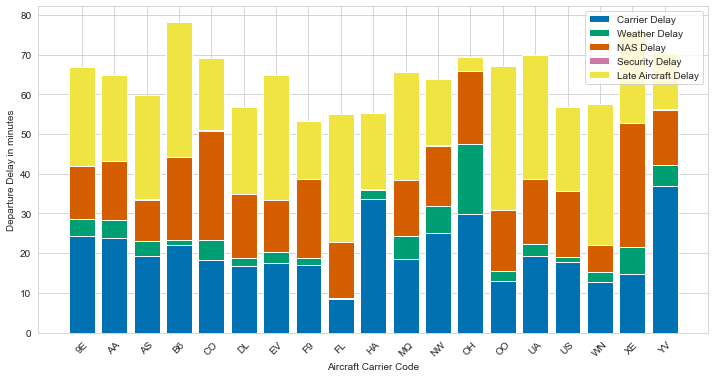

In [61]:
import matplotlib.pyplot as plt

df['total_delay'] = (df['CarrierDelay'] + df['WeatherDelay']
             + df['NASDelay'] + df['SecurityDelay'] + df['LateAircraftDelay'])

df_delayed = df[~np.isnan(df['total_delay'])]
df['total_delay'].fillna(0, inplace=True)
df_delayed.head()

carrier_group = df_delayed['CarrierDelay'].groupby(df_delayed['UniqueCarrier']).mean()
weather_group = df_delayed['WeatherDelay'].groupby(df_delayed['UniqueCarrier']).mean()
nas_group = df_delayed['NASDelay'].groupby(df_delayed['UniqueCarrier']).mean()
security_group = df_delayed['SecurityDelay'].groupby(df_delayed['UniqueCarrier']).mean()
late_group = df_delayed['LateAircraftDelay'].groupby(df_delayed['UniqueCarrier']).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

x = carrier_group.index.values

fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(len(x)),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(len(x)),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(len(x)),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(len(x)),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Departure Delay in minutes')

plt.legend()
plt.show()


In [ ]:
#Since carrier mean delay seemed to be correlated to cancellations when grouped by carrier, we add the average carrier delay as a column to the main dataset, and we will use this as a feature rather than the carrier column

In [65]:
df['Carrier mean delay'] = df['total_delay'].groupby(df['UniqueCarrier']).transform('mean')
df['Carrier mean distance'] = df['Distance'].groupby(df['UniqueCarrier']).transform('mean')
df['Carrier cancellations'] = df['Cancelled'].groupby(df['UniqueCarrier']).transform('mean')
df['Origin cancellations'] = df['Cancelled'].groupby(df['Origin']).transform('mean')
df['Dest cancellations'] = df['Cancelled'].groupby(df['Dest']).transform('mean')

df['Origin TaxiOut'] = df['TaxiOut'].groupby(df['Origin']).transform('mean')
df['Origin Delay'] = df['total_delay'].groupby(df['Origin']).transform('mean')

df['Origin'] = df['Origin'].astype('category').cat.codes
df['Dest'] = df['Dest'].astype('category').cat.codes
df['CancellationCode'] = df['CancellationCode'].astype('category').cat.codes
df.fillna(0, inplace=True)

#print(len(df))

# X = df[['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'Origin', 'Dest', 'Distance', 'Carrier mean distance',
#         'total_delay', 'TaxiOut']]
# X = df[['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'Origin', 'Dest', 'Distance', 'Carrier mean distance',
#        'Carrier cancellations', 'Origin cancellations', 'Dest cancellations']]
# X = df[['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime']]
X = df[['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'Origin', 'Dest', 'Distance', 'Carrier mean distance',
        'Origin Delay', 'Origin TaxiOut']]
y = df['Cancelled']


# The code below was used for intermediate parameter searches as the full set was too big 
# and took too long to train each set of parameters

# df1 = df.sample(n=50000, random_state = 47)
# X = df1[['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'Origin', 'Dest', 'Distance', 'Carrier mean distance',
#         'Origin Delay', 'Origin TaxiOut']]
# y = df1['Cancelled']

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [ ]:
#WE TRY RANDOM FOREST CLASSIFIER

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

clf = RandomForestClassifier(n_estimators=50, random_state=47).fit(X_train, y_train)

# sum(y_test)
# clf.score(X_test, y_test)

y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
#confusion
#sum(y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted)))
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)
print('Feature importances: {}'.format(clf.feature_importances_))

Recall: 0.000
Precision: 0.000
Accuracy: 0.999
F1: 0.000
[[102981      3]
 [   135      0]]
Feature importances: [0.01926    0.24180567 0.13797863 0.2548946  0.0342093  0.09298849
 0.10751921 0.04335387 0.03404035 0.03394989]


In [69]:
#NOW LETS TRY A GRADIENT BOOSTING TREE

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=300, learning_rate = 0.003, 
                                 max_depth = 2, random_state=37).fit(X_train, y_train)

y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted)))
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)
print('Feature importances: {}'.format(clf.feature_importances_))

Recall: 0.000
Precision: 0.000
Accuracy: 0.999
F1: 0.000
[[102984      0]
 [   135      0]]
Feature importances: [0.26311779 0.00479364 0.         0.         0.21146123 0.0190251
 0.10225401 0.30229556 0.00745937 0.0895933 ]


C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
### With the given data, the decision tree algorithms were unable to correctly predict any cancelled flights

In [ ]:
### Now let's try a grid search in Support Vector classifiers.

In [ ]:
# np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# clf = SVC(kernel='rbf')
# #grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'C': [0.01, 0.1, 1, 10, 100]}
# #grid_values = {'gamma': [0.1, 1, 10, 100], 'C': [100, 300, 1000, 3000]}
# grid_values = {'gamma': [3, 6, 10], 'C': [100, 300, 1000, 3000]}

# grid_clf = GridSearchCV(clf, param_grid = grid_values, scoring = 'recall')
# grid_clf.fit(X_train_scaled, y_train)
# grid_clf.cv_results_['mean_test_score'].reshape(4,3)

In [ ]:
### The grid search was first performed using samples of the full dataset with only 50,000 rows, then when I found the right set of parameters I did the grid search using the full dataset. This takes several hours on my macbook, so I've commented it out here, but the best parameters for the support classifier are gamma

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

svm = SVC(kernel='rbf', C=1000, gamma=6, random_state=47).fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('F1: {:.3f}'.format(f1_score(y_test, y_pred)))
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

y_scores = svm.decision_function(X_test_scaled)
y_score_list = list(zip(y_test[0:20], y_scores[0:20]))

Recall: 0.022
Precision: 0.012
Accuracy: 0.996
F1: 0.016
[[102746    238]
 [   132      3]]


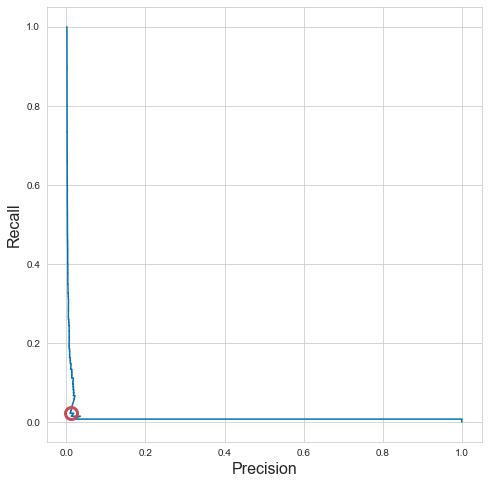

In [71]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

fig, ax1= plt.subplots(figsize=(8,8))
#plt.figure(figsize=(8,8))
ax1.plot(precision, recall, label='Precision-Recall Curve')
ax1.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
ax1.set_xlabel('Precision', fontsize=16)
ax1.set_ylabel('Recall', fontsize=16)
ax1.set_aspect('equal')
plt.show()

AUC: 0.664


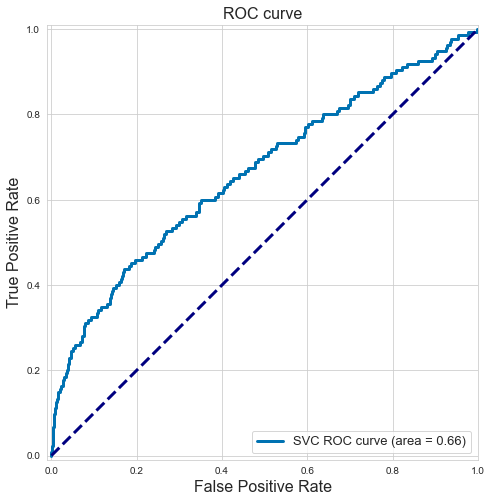

In [72]:
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('AUC: {:.3f}'.format(roc_auc))

fig, ax1= plt.subplots(figsize=(8,8))
#plt.figure(figsize=(8,8))
ax1.set_xlim([-0.01, 1.00])
ax1.set_ylim([-0.01, 1.01])
ax1.plot(fpr, tpr, lw=3, label='SVC ROC curve (area = {:0.2f})'.format(roc_auc))
ax1.set_xlabel('False Positive Rate', fontsize=16)
ax1.set_ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
ax1.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
ax1.set_aspect('equal')
plt.show()

In [ ]:
#NOW LET's LOGISTIC REGRESSION GRID SEARCH

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

lr = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
grid_lr = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall').fit(X_train_scaled, y_train)
print(grid_lr.cv_results_['mean_test_score'].reshape(9,2))

C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\model_selection\_v

[[nan 0.000]
 [nan 0.000]
 [nan 0.000]
 [nan 0.000]
 [nan 0.000]
 [nan 0.000]
 [nan 0.000]
 [nan 0.000]
 [nan 0.000]]


In [ ]:
#LET's TRY A NEURAL NETWORK SEARCH

In [74]:
from sklearn.neural_network import MLPClassifier

nnclf = MLPClassifier(hidden_layer_sizes = [5,5], solver='adam', alpha=0.0003, activation='relu',
                     max_iter = 100, random_state = 47).fit(X_train_scaled, y_train)

y_predicted = nnclf.predict(X_test_scaled)
confusion = confusion_matrix(y_test, y_predicted)

print('Recall: {:.3f}'.format(recall_score(y_test, y_predicted)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_predicted)))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('F1: {:.3f}'.format(f1_score(y_test, y_predicted)))
confusion = confusion_matrix(y_test, y_predicted)
print(confusion)

Recall: 0.000
Precision: 0.000
Accuracy: 0.999
F1: 0.000
[[102984      0]
 [   135      0]]


C:\Users\ruthv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Cancellation Classification summary:

### Unsurprisingly, all of the machine learning algorithms presented here did a poor job predicting cancelled flights. Only the support vector classifier was able to correctly predict any cancelled flights, but only about 2% of them. If airlines do employ machine learning models to predict cancellations, they are most likely more sophisticated and include all sorts of data that we don't have access to here. Namely, current weather and aircraft/airport maintenance data. It makes sense that if you didn't need that current data to predict cancellations, there would be a lot fewer last-minute cancellations.


## Now let's see how well we can predict the delay times of flights (regression):

In [75]:
df['Dest mean taxiIn'] = df['TaxiIn'].groupby(df['Dest']).transform('mean')
df['Origin mean taxiOut'] = df['TaxiIn'].groupby(df['Dest']).transform('mean')

X = df[['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'Distance', 'Carrier mean distance',
       'Dest mean taxiIn', 'Origin mean taxiOut']]

y = df['total_delay']

In [76]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
### Here we'll try to use polynomials of our features to fit a linear regression model that attempts to predict delay times.

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
X_train_scaled_poly = poly.fit_transform(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test_scaled_poly = poly.transform(X_test_scaled)

linreg = Ridge(alpha=1.0).fit(X_train_scaled_poly, y_train)

print('(poly deg 5 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_scaled_poly, y_train)))
print('(poly deg 5 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_scaled_poly, y_test)))

MemoryError: Unable to allocate 1013. MiB for an array with shape (103119, 1287) and data type float64

In [ ]:
### I found that a 5th degree polynomial of the features worked best, but not that great

In [78]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 31, algorithm='auto').fit(X_train_scaled, y_train)

print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test_scaled, y_test)))

R-squared test score: 0.139


In [79]:
from sklearn.neural_network import MLPRegressor

mlpreg = MLPRegressor(hidden_layer_sizes = [50,50,50],
                             activation = 'relu',
                             alpha = 0.0003,   #0.0003,
                             solver = 'lbfgs').fit(X_train_scaled, y_train)

print('R-squared test score: {:.3f}'
     .format(mlpreg.score(X_test_scaled, y_test)))

MemoryError: Unable to allocate 118. MiB for an array with shape (309354, 50) and data type float64

In [ ]:
# Delay Time Regression Summary:

### The features used for predicting delay times did not use data that could not be know days/weeks in advance of the flights. However, the argument could be made that the averaged features include "future" data from the perspective of many of the flights. I don't think this introduces any significant concerns of "data leakage", as there is no reason to expect these averages to be changing significantly with time. Furthermore, any "production ready" models could be engineered to avoid this problem and only use averages of flights before the one being predicted.

In [ ]:
### Even so, the models did not do a great job predicting flight delay times. The KNN regressor did the best job with and R-squared score of 0.139, while both the linear regressor (with Ridge regularization and 5th degree polynomial features) and the neural network (with 3 hidden layers each of size 150) had R-squared scores lower that 0.1. Similarly to the cancellation prediction models, these could be augmented with real-time data about current weather and aircraft/airport maintenance data to give much more accurate results.